# Advanced Data Analysis

## Using a Double Index to Work with Panel Data
In any project, it will not be uncommon for data to be attached to more than one indentifying category. Often, data will be labeled by polity and by date. In the next several examples, we will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period.

## Plotting with Double Index

We will be working with two datasets in the next example: the Fraser Economic Freedom Index and GDP from the Maddison Project.

Due to the formatting of the Fraser Economic Freedom Index, the first column and the first three rows of data in the sheet titled “EFW Index 2018 Report” are blank. We will account for this when importing the data with pandas. Both should be saved in the same folder as the script below.

First, import the GDP data from Maddison Project:

In [9]:
# import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraserDataWithRGDPPC.csv",
                   index_col = ["ISO_Code_3", "Year"],
                  parse_dates = True).rename(columns = {"Summary": "EFW"})
data

Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1971-01-01                               NaN          NaN   
           1972-01-01                               NaN          NaN   
           1973-01-01                               NaN          NaN   
           1974-01-01                               NaN          NaN   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        1970-01-01                               NaN         NaN   
           1971-01-01                               NaN         NaN   
           1972-01-01                               NaN         NaN   
           1973-01-01                               NaN         NaN   
           1974-01-01                               NaN         NaN   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  
ISO_Code_3 Year                         
AGO        1970-01-01              NaN  
           1971-01-01              NaN  
           1972-01-01              NaN  
           1973-01-01              NaN  
           1974-01-01              NaN  
...                                ...  
ZWE        2014-01-01         0.215452  
           2015-01-01         0.106888  
           2016-01-01         0.012463  
           2017-01-01        -0.013579  
           2018-01-01         0.004606  

[8085 rows x 8 columns]

When working with a multi index, calling the values from a single index requires a few steps. If you were to call data.index in the console, both the countrycode and the year values would be returned:

In [10]:
data.index[0]

('AGO', Timestamp('1970-01-01 00:00:00'))

# Isolate each individual that comprises the multiindex

In [11]:
countries = data.index.get_level_values("ISO_Code_3").unique()
countries

Index(['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       ...
       'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='ISO_Code_3', length=165)

In [12]:
years = data.index.get_level_values("Year").unique()
years

DatetimeIndex(['1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

# Creating Indicator Variables

Suppose that we wanted to test the idea that geography influences economic growth. We would need to clarify a hypothesis concerning this. We might believe, for example, that countries in North America tend to have a distinct real gross domestic product than in other continents i.e., real GDP tends to be higher or lower due to residing in North America. To represent this, we would create an indicator variable named “North America”. Countries residing in North America would be indicated with a 1 (i.e., True), and those outside of North America would receive a zero.

To accomplish this task is straightforward if you know the appropriate commands to use. As usual, we import the data. Before creating an indicator variable, you will need to choose the name that will reference the indicator variable, indicator_name, and make a list of the index values, target_index_list that will be recorded as possessing the attribute referred to by the indicator variable. Finally, you will need to choose the name of the index column that includes the elements in the target_index_list. If you are not sure what this name is, you can check the names of the index columns using df.index.names.

In [13]:
def create_indicator_variable(data, indicator_name, 
                              index_name, target_index_list):
    data[indicator_name] = 0
    data[indicator_name][data.index.get_level_values(
        index_name).isin(target_index_list)] = 1
    #for index in target_index_list:
       # data.loc[data.index.get_level_values(
           # index_name) ==index, [indictor_name]] = 1
index_name = data.index.names[0]
indicator_name = "North America"
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
create_indicator_variable(data = data,
                         indicator_name = indicator_name,
                         index_name = index_name,
                         target_index_list = countries_in_north_america)
data.loc["USA"]

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_18719/2663745454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name][data.index.get_level_values(


,Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita,North America
Year,,,,,,,,,
1970-01-01,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,NaN,1
1971-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1972-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1973-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1974-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1975-01-01,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,0.080100,1
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1977-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1978-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# Plotting Indicator Variables in Scatter

It is useful to represent discrete variabls, like the indicator variable for "North America", by color in a scatter plot. If there is a difference means between two groups, it is often apparrent when data is visualized by color. In the case of the "North America" indicator variable, the difference in means between the groups does not appear to be causal (statistically significant), as we will show later in the chapter.

We use "North America" as the variable indicating color in the scatter plot.

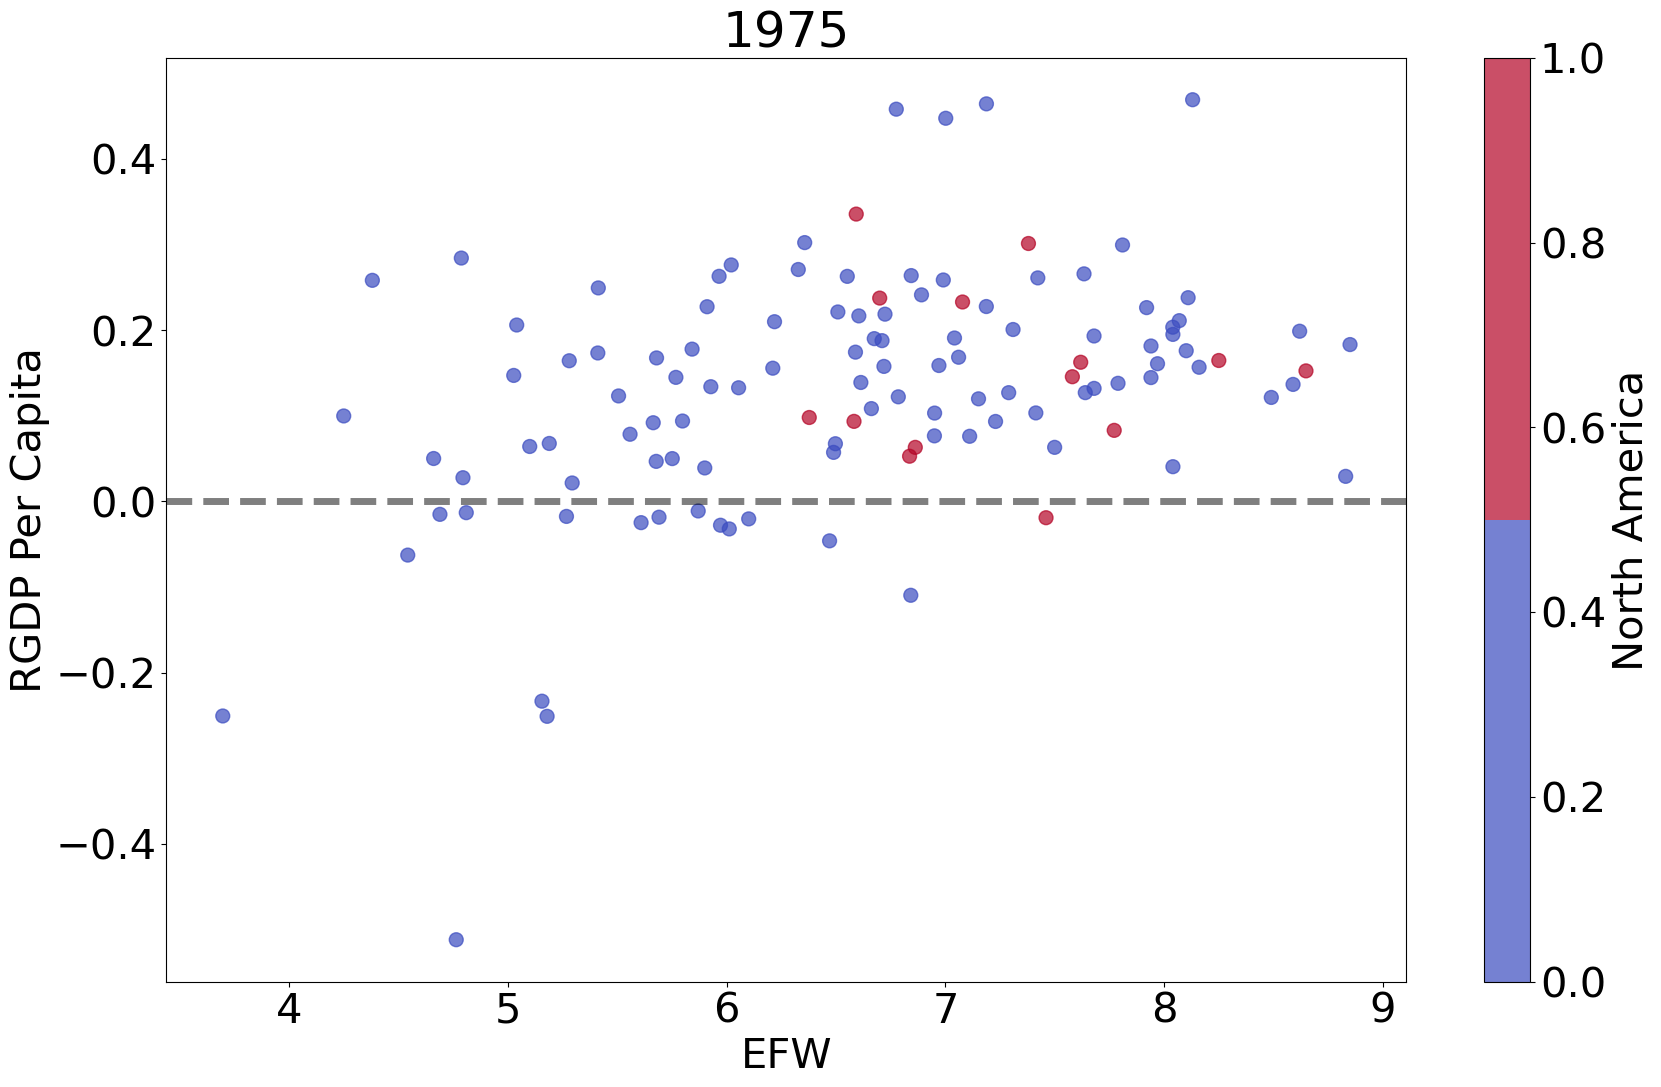

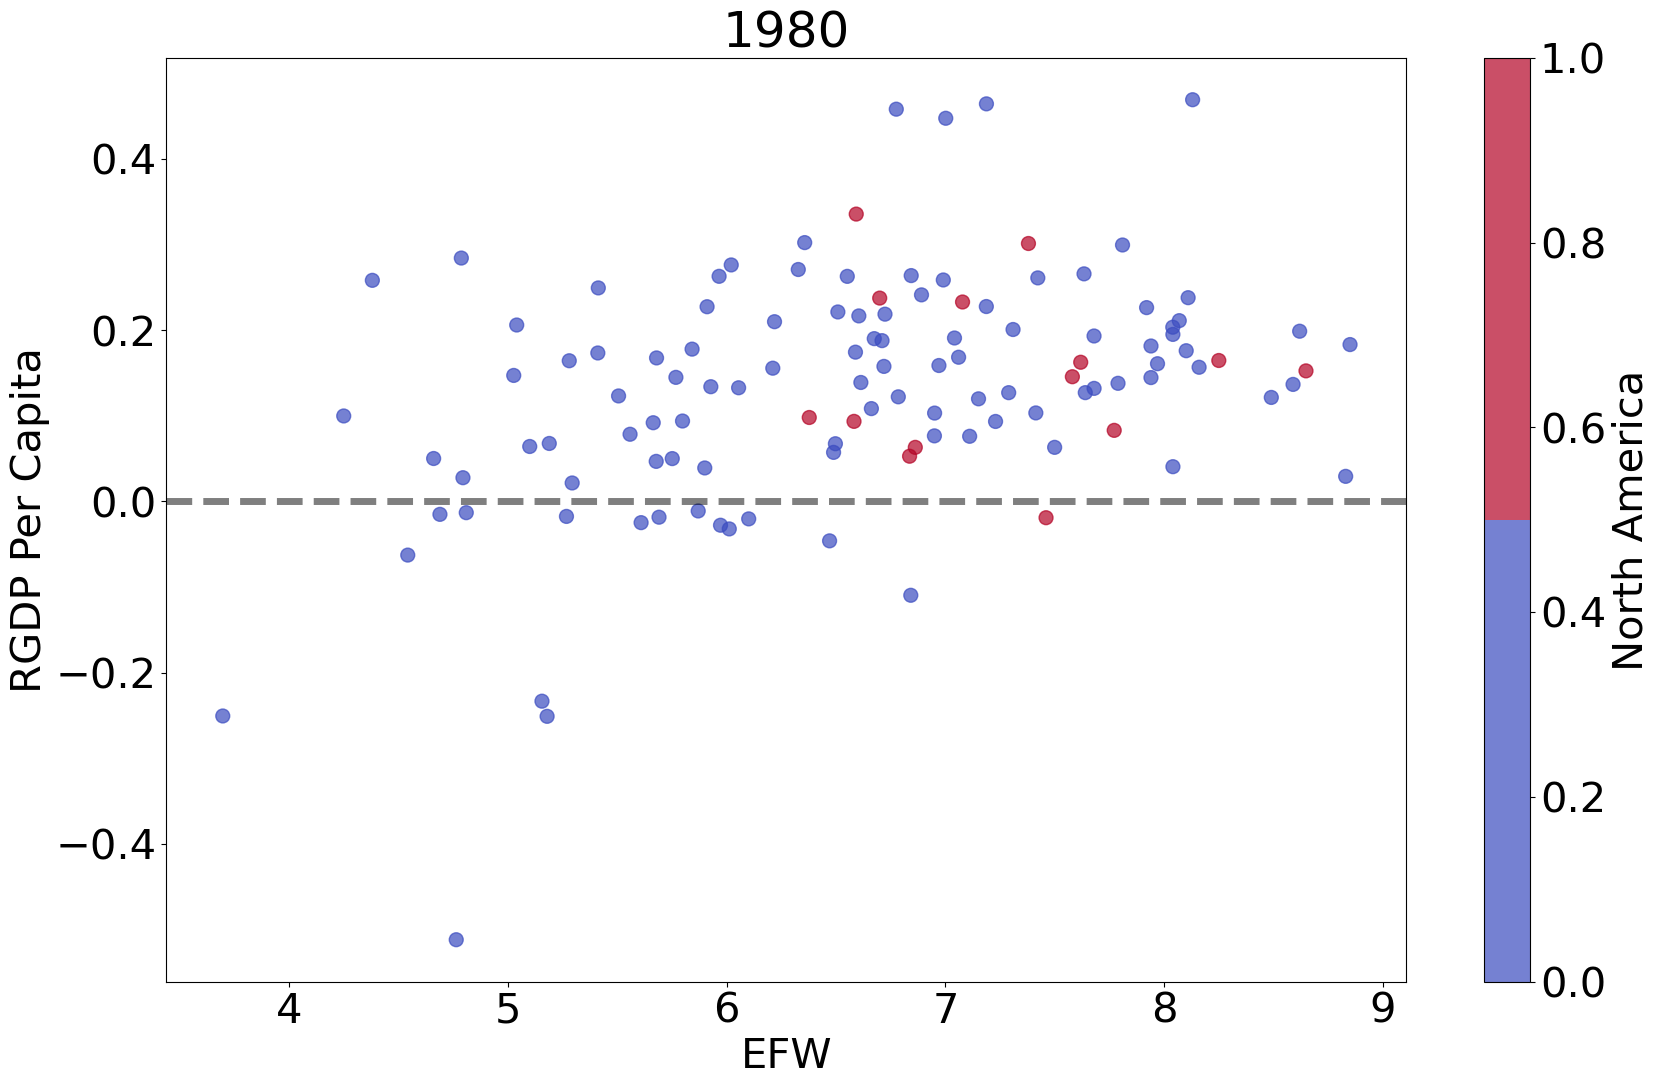

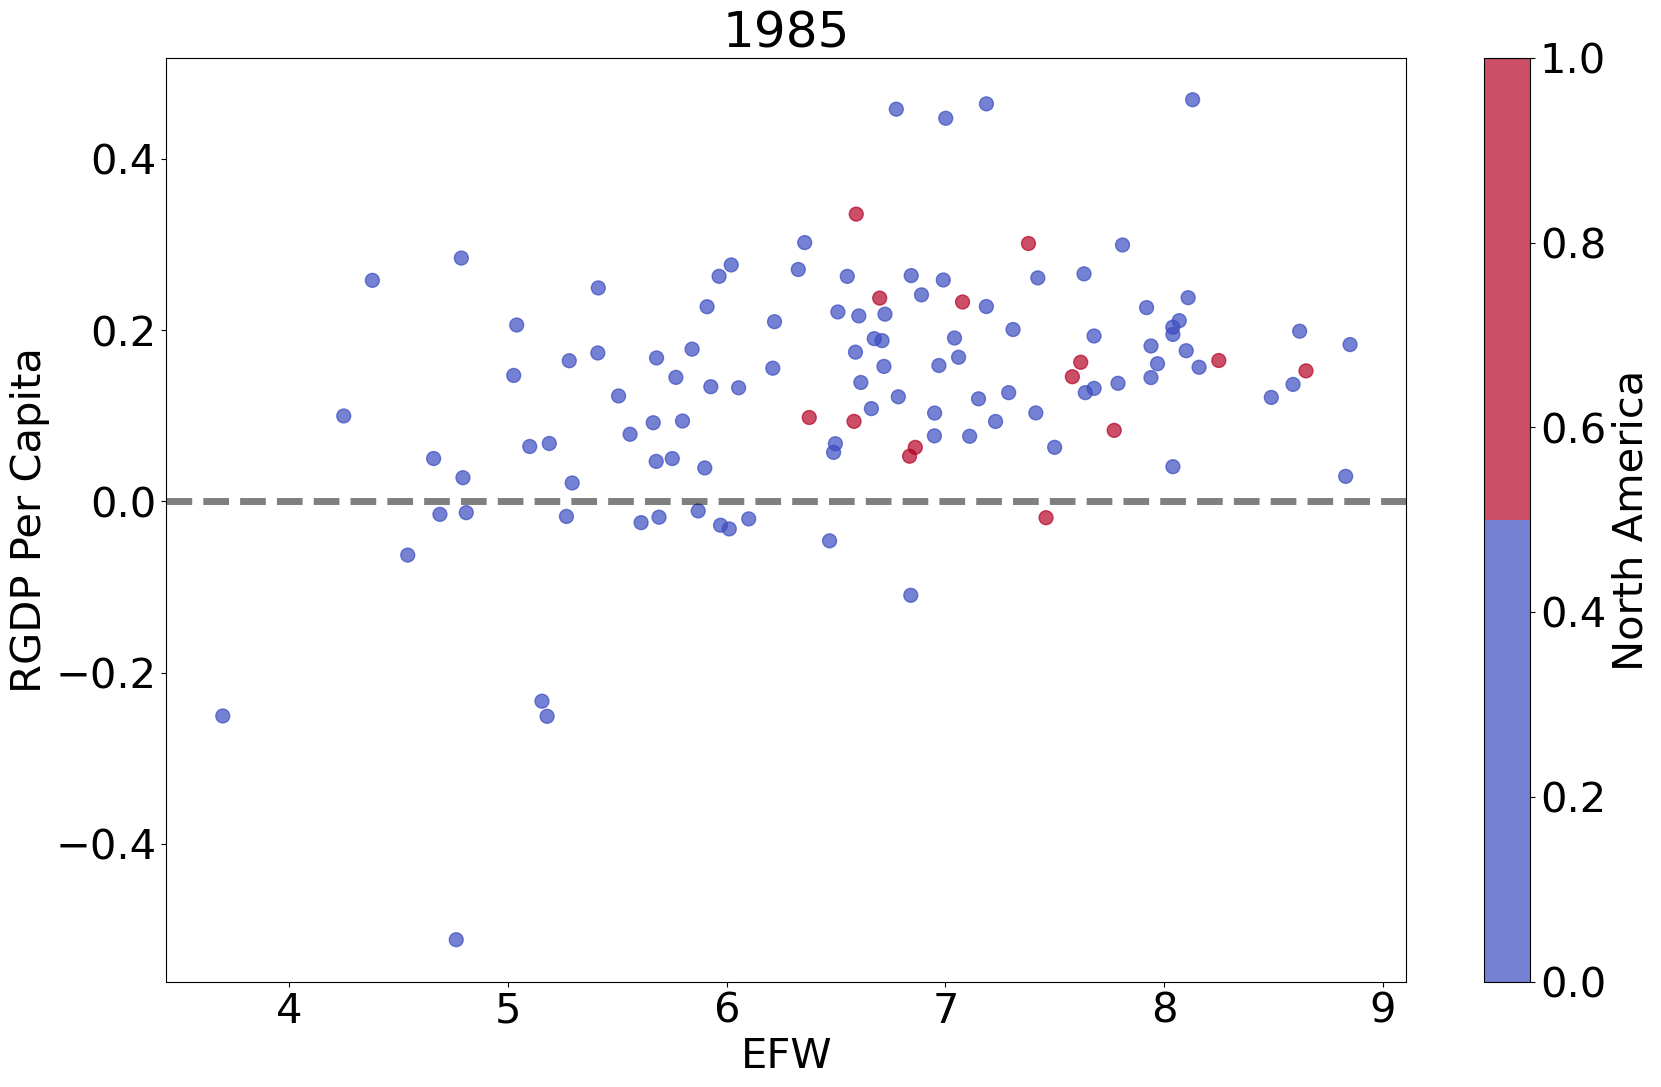

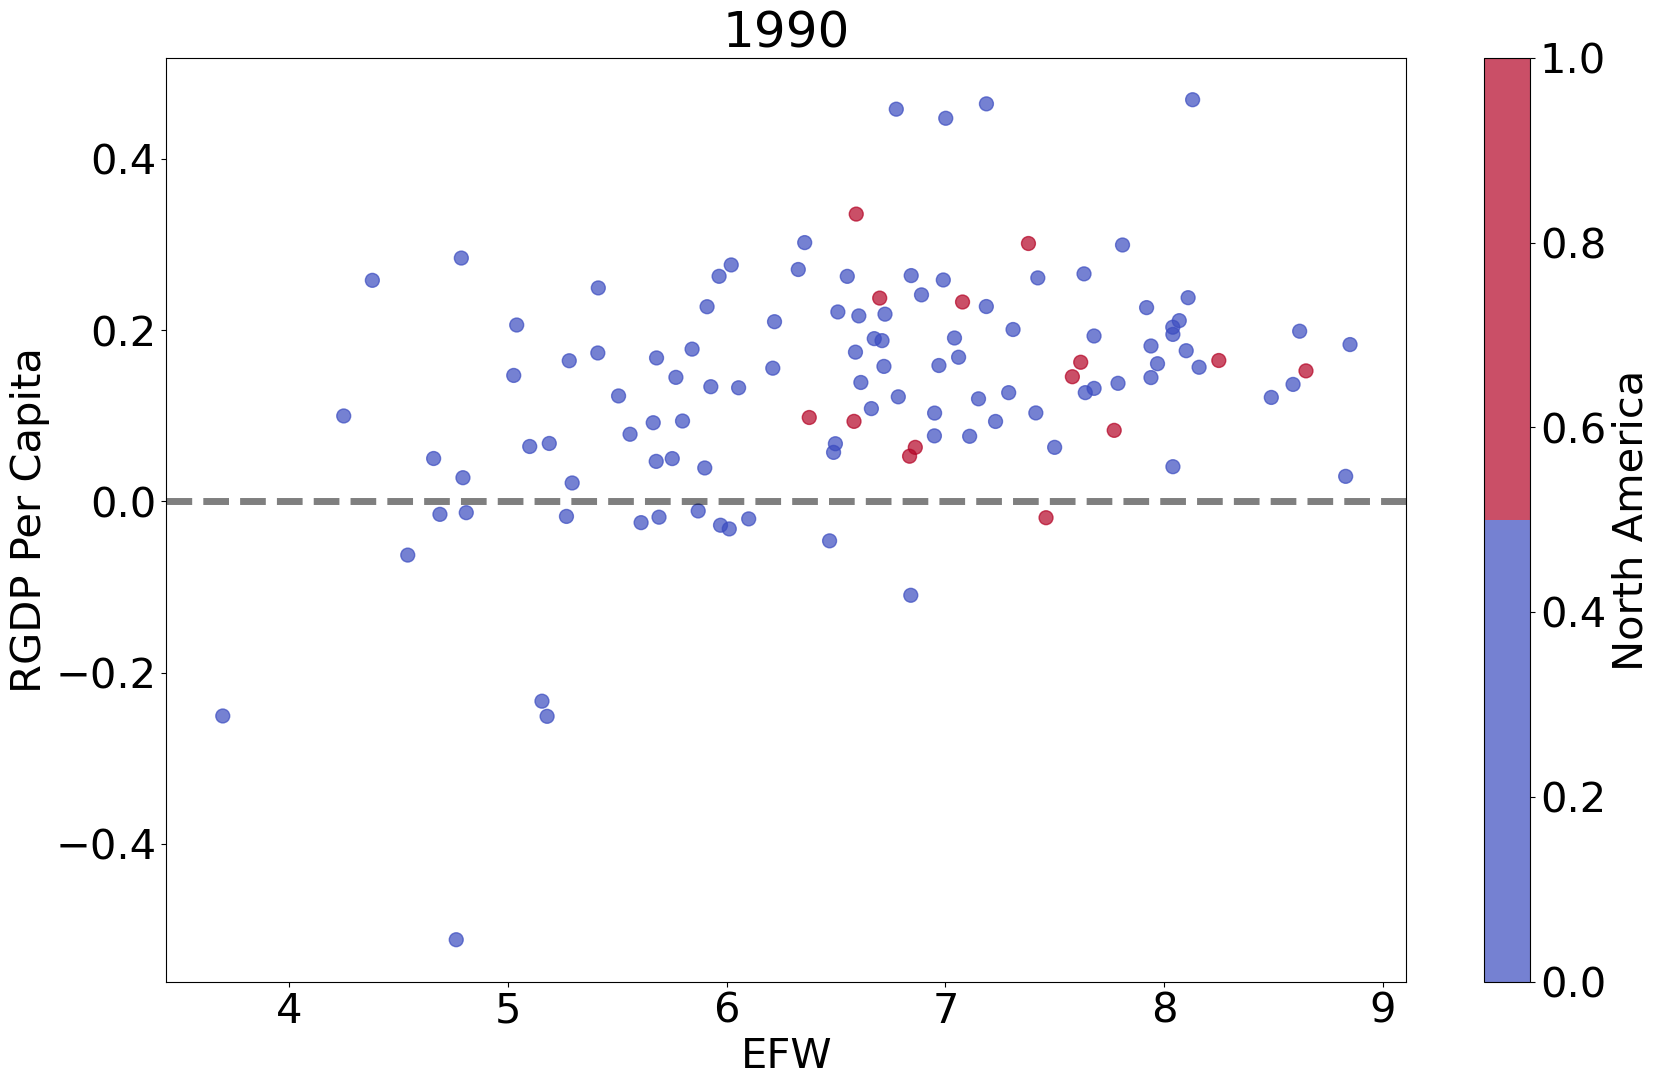

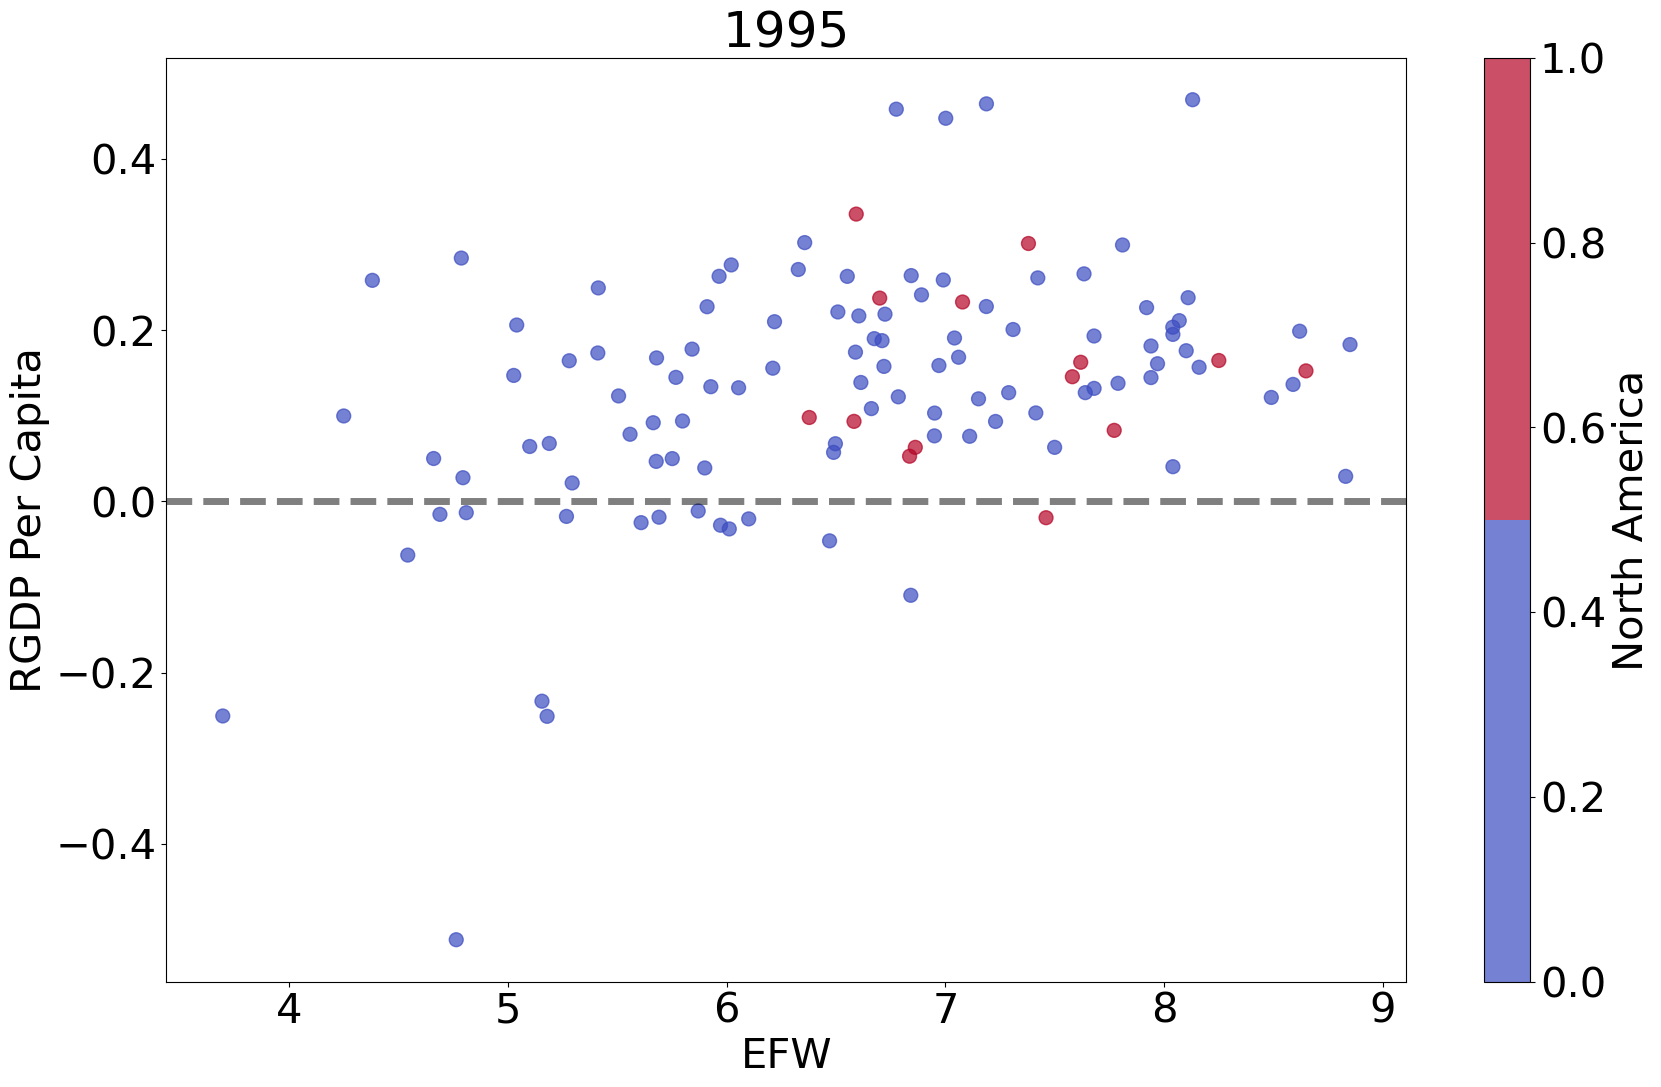

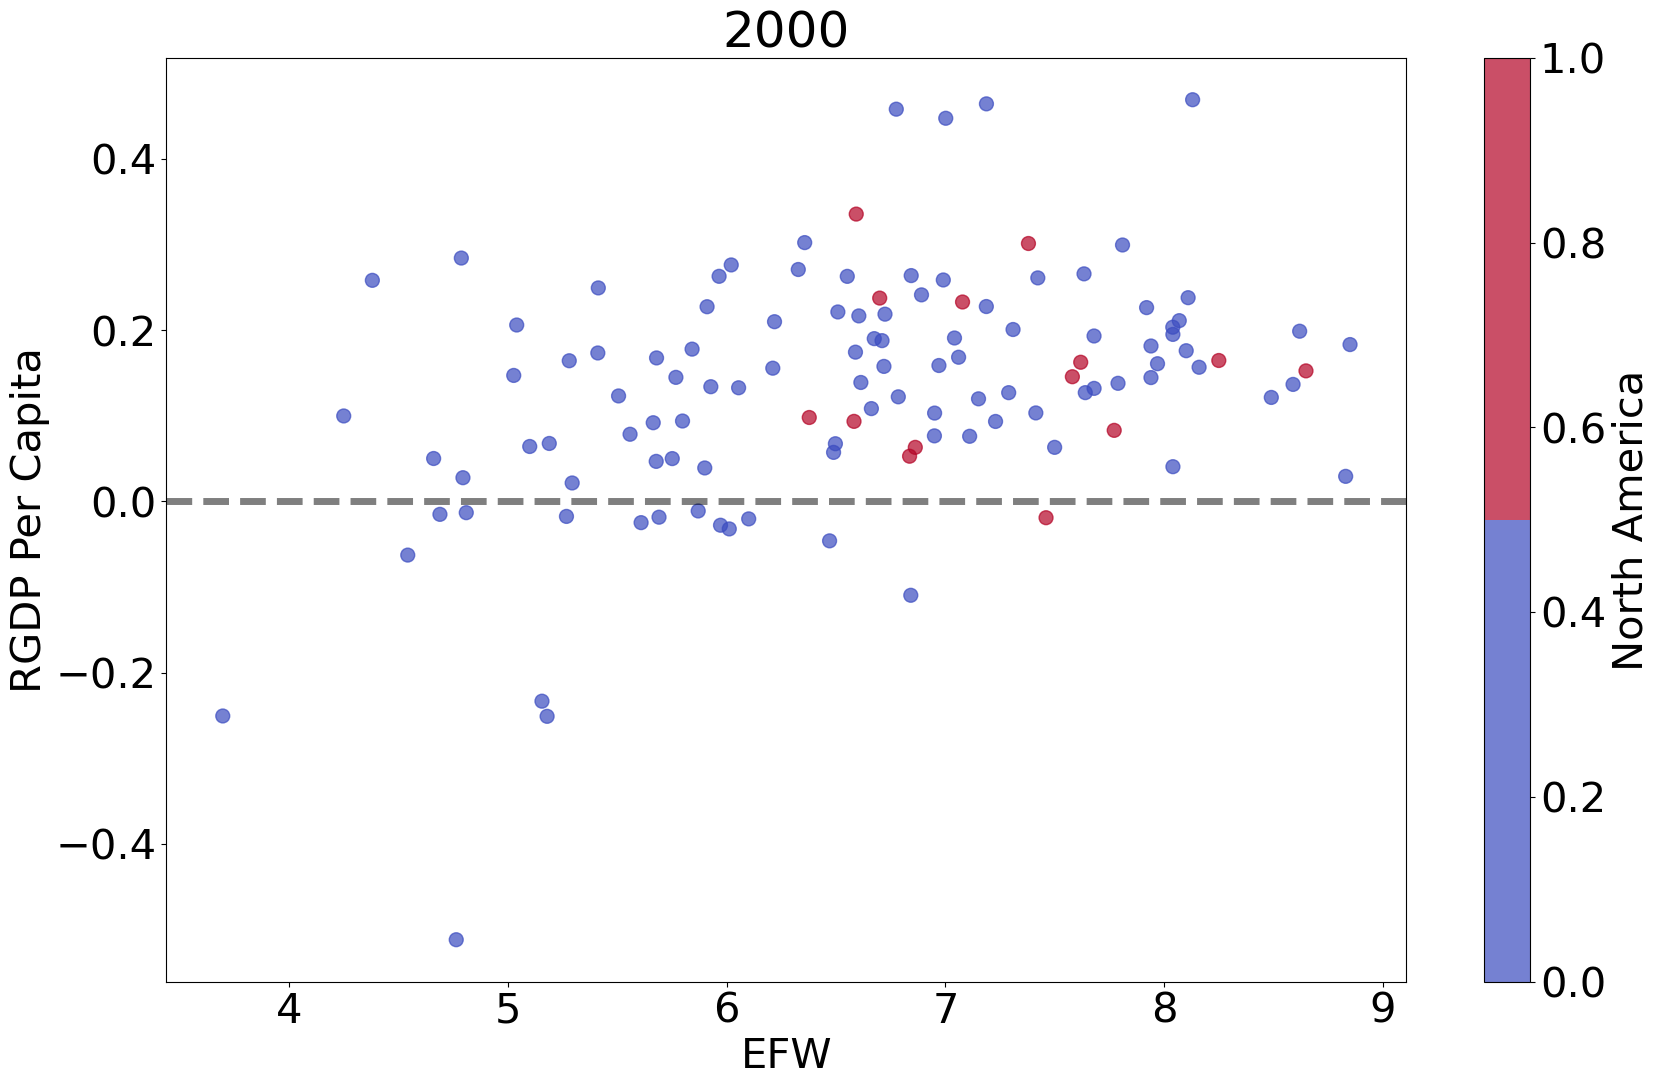

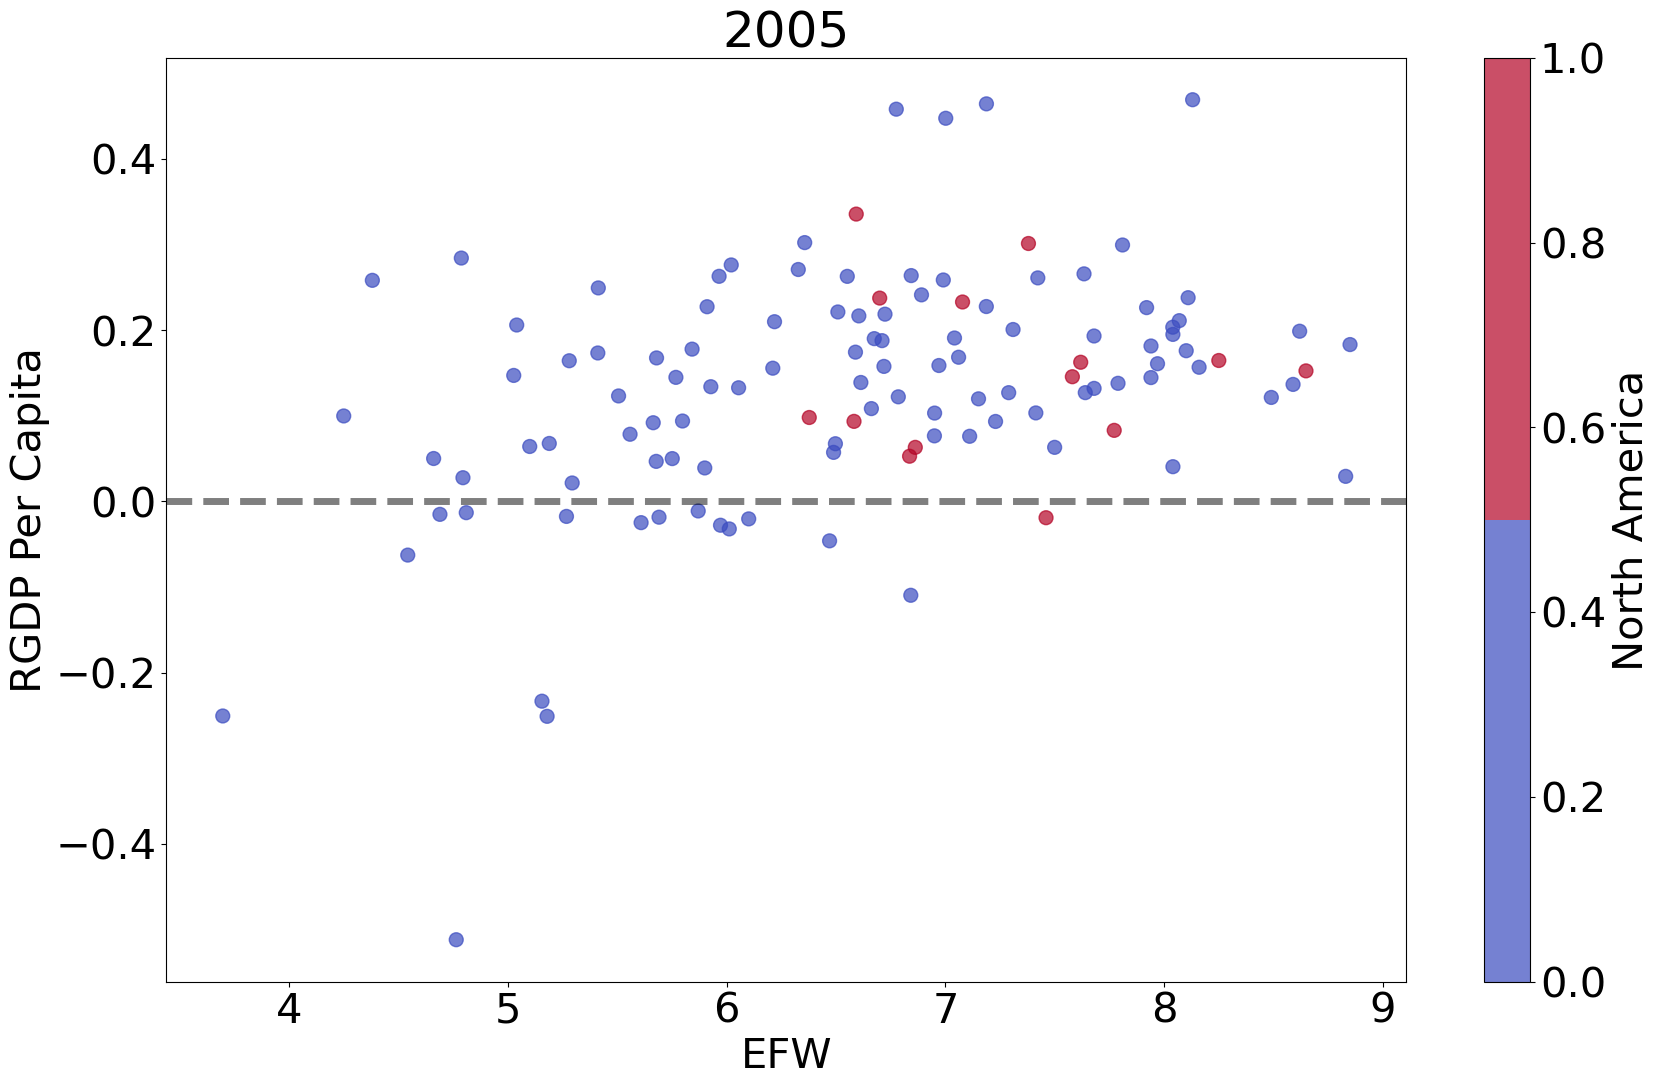

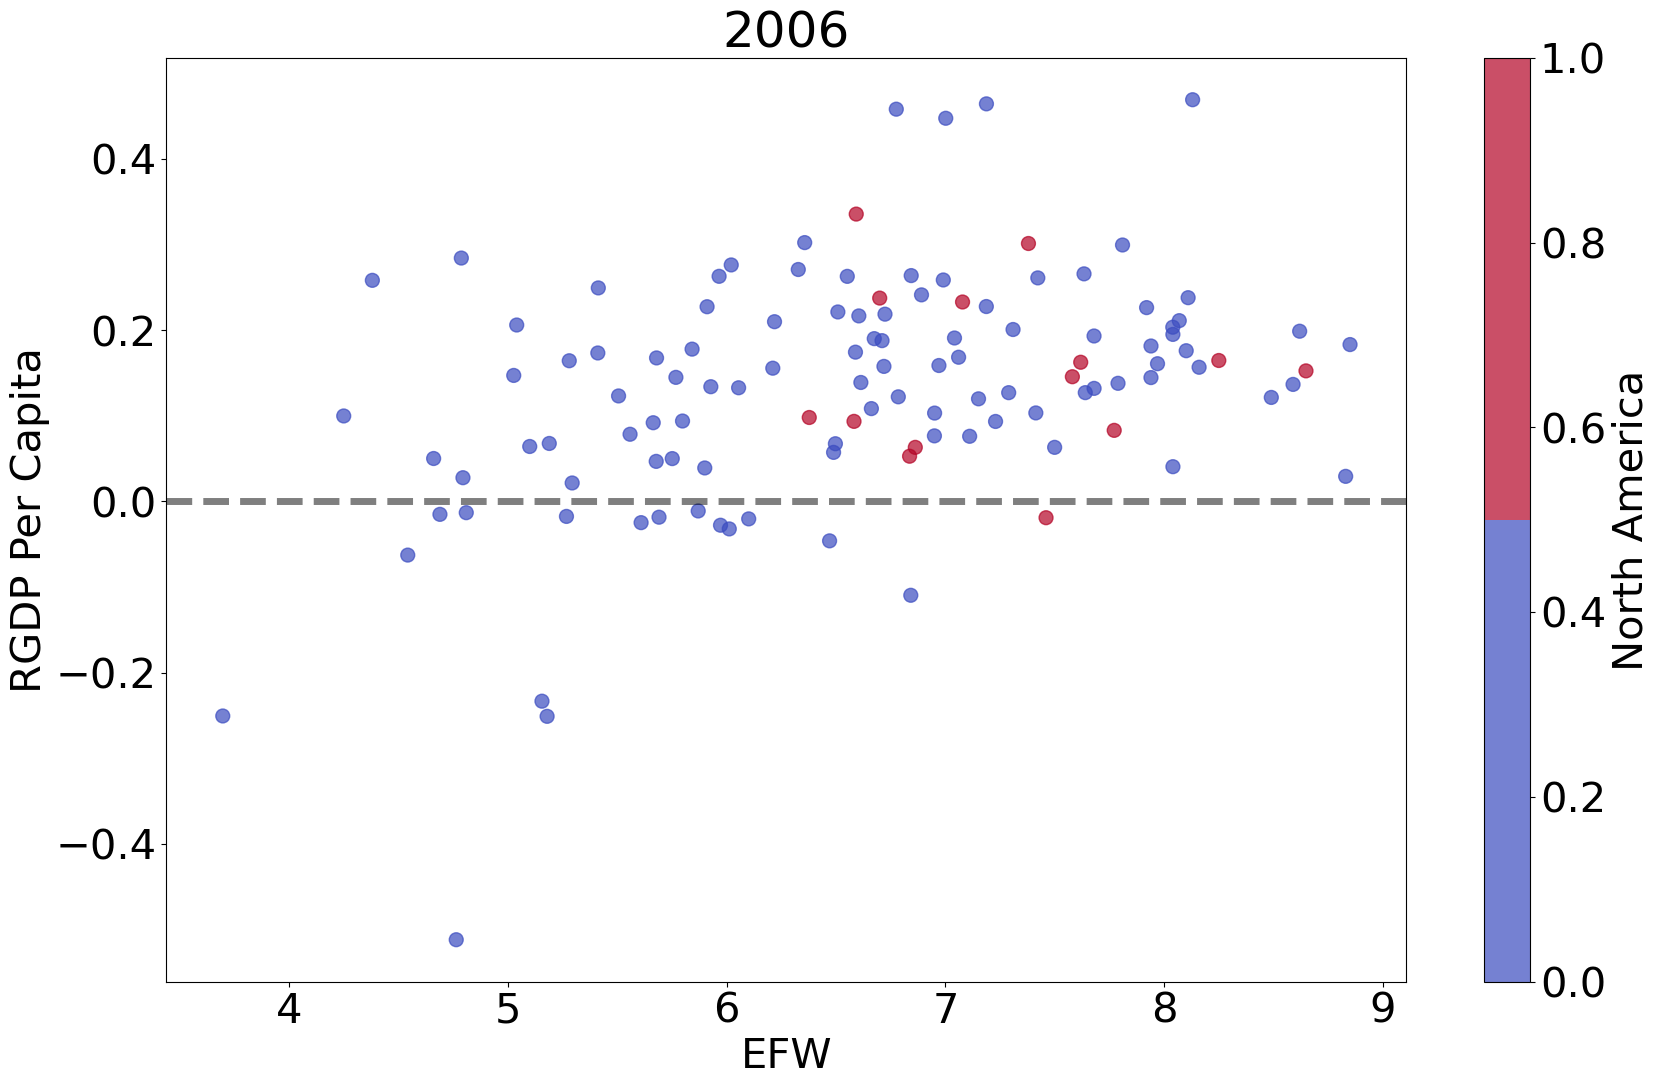

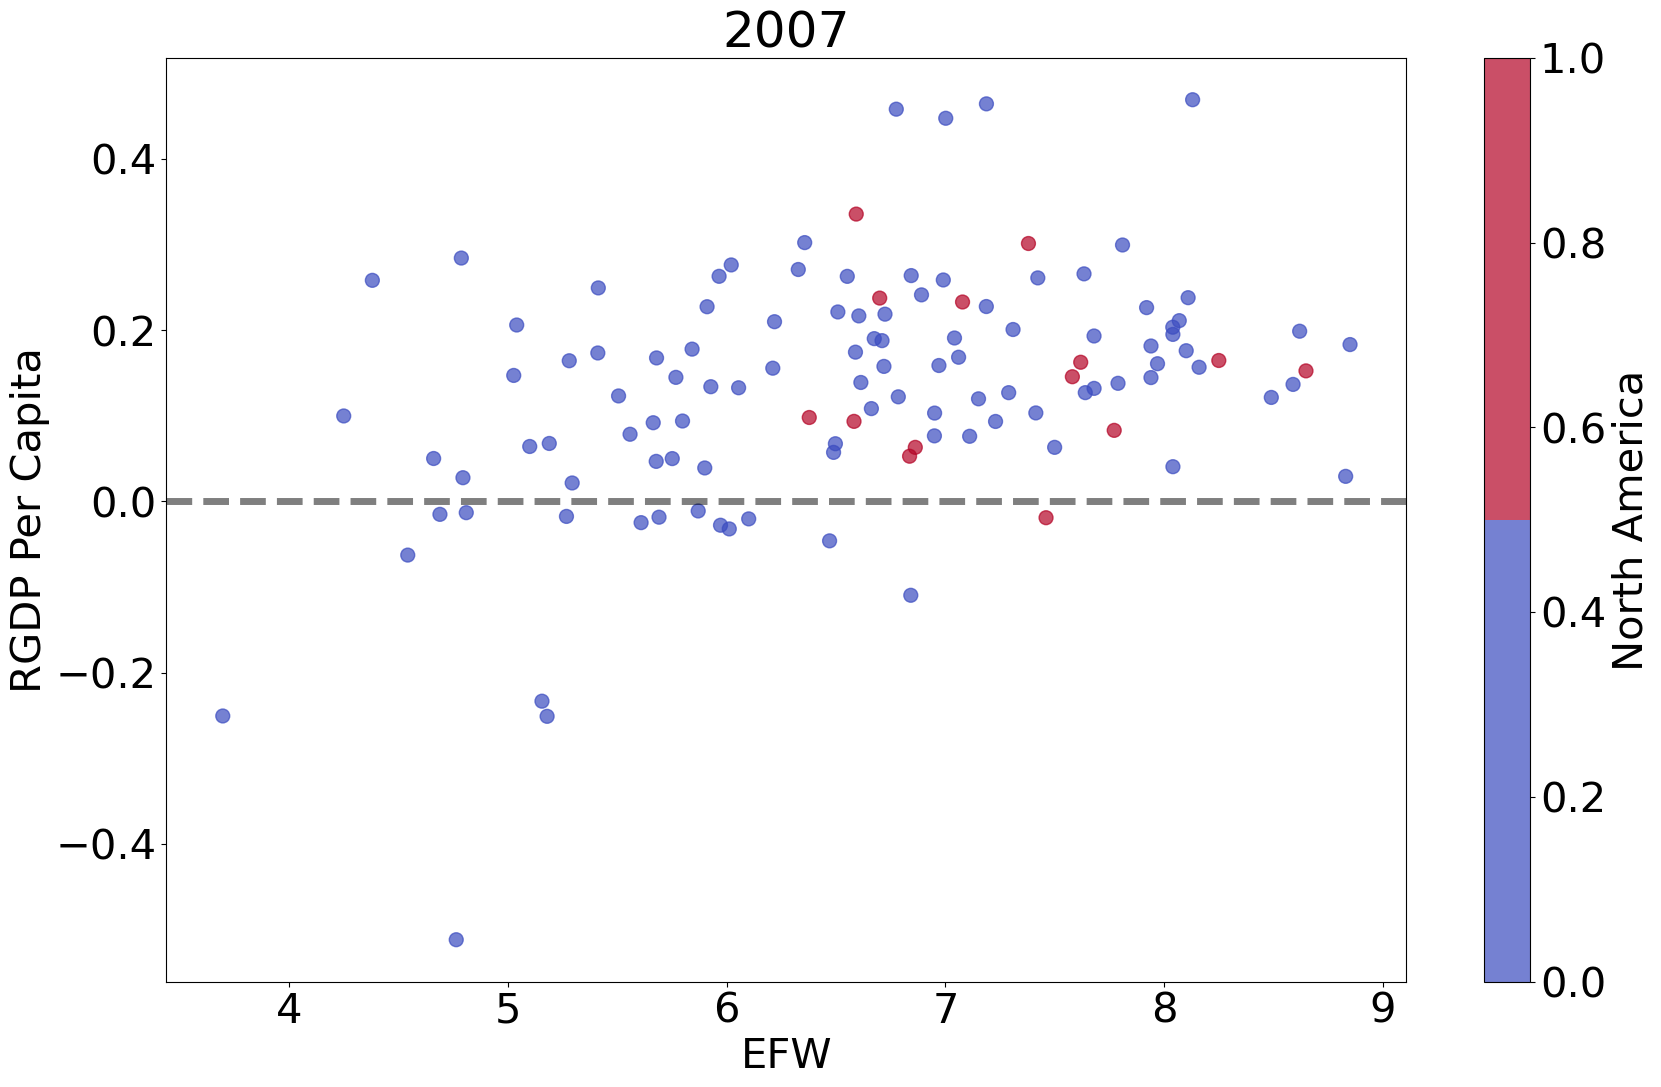

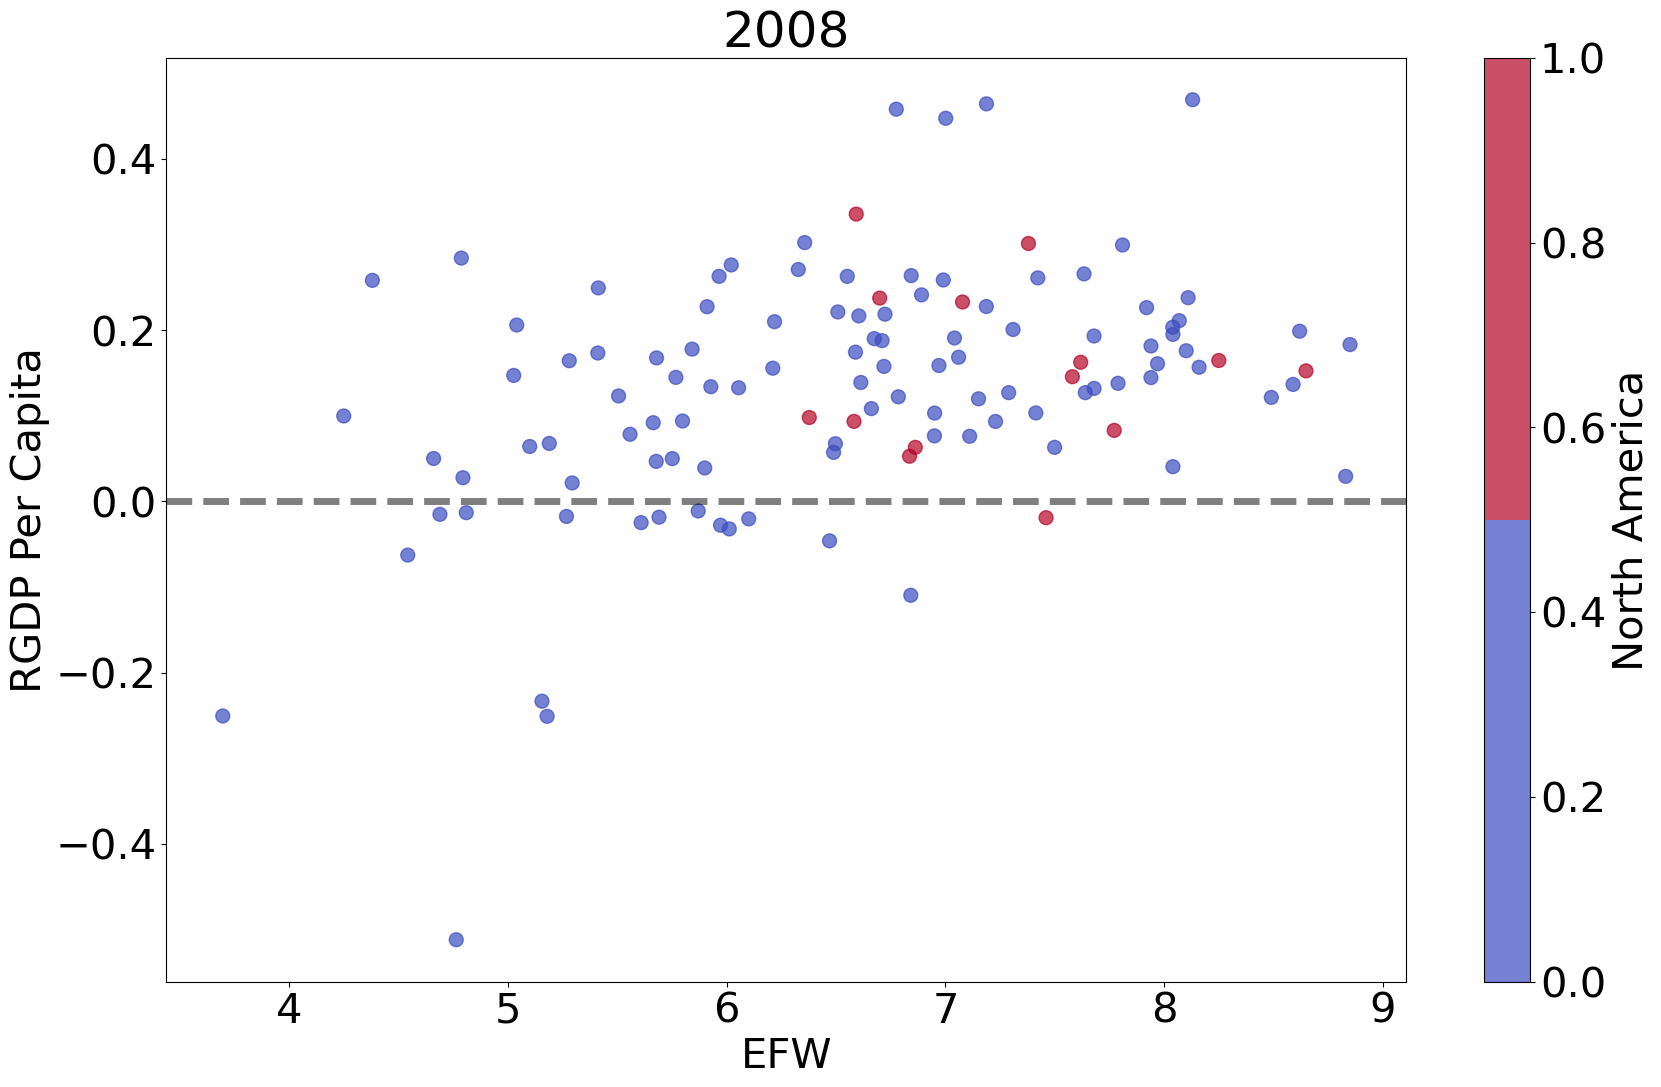

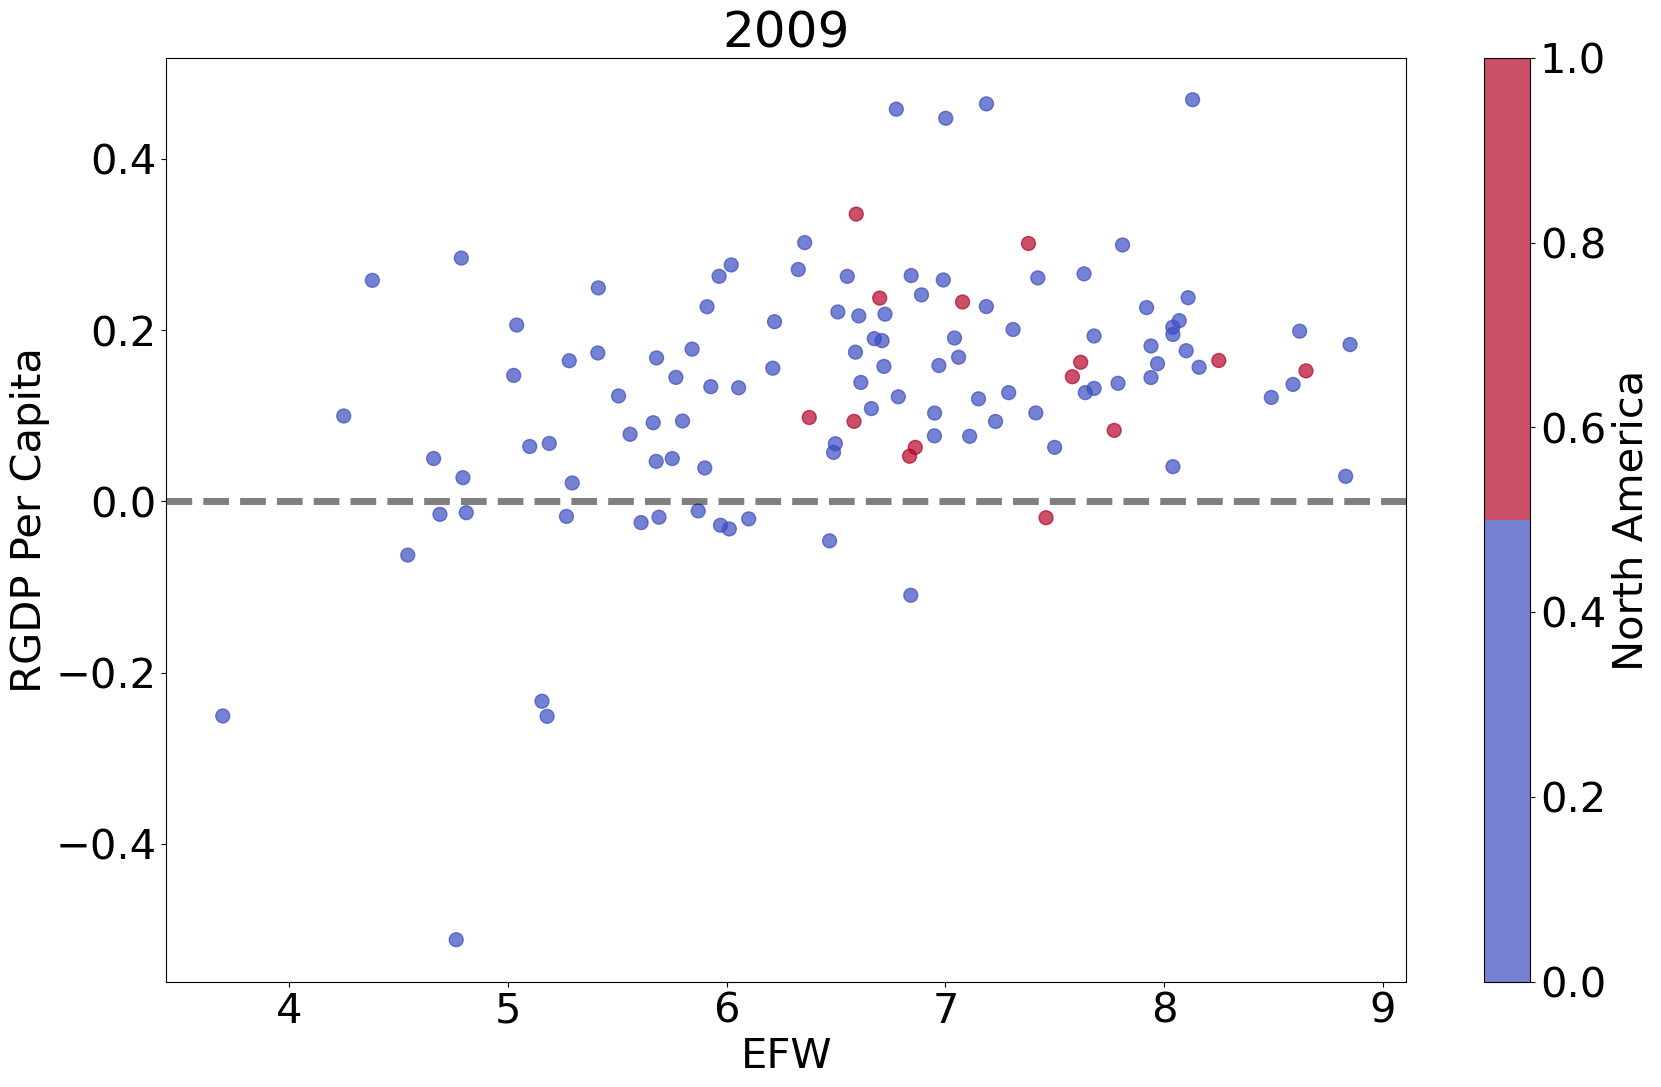

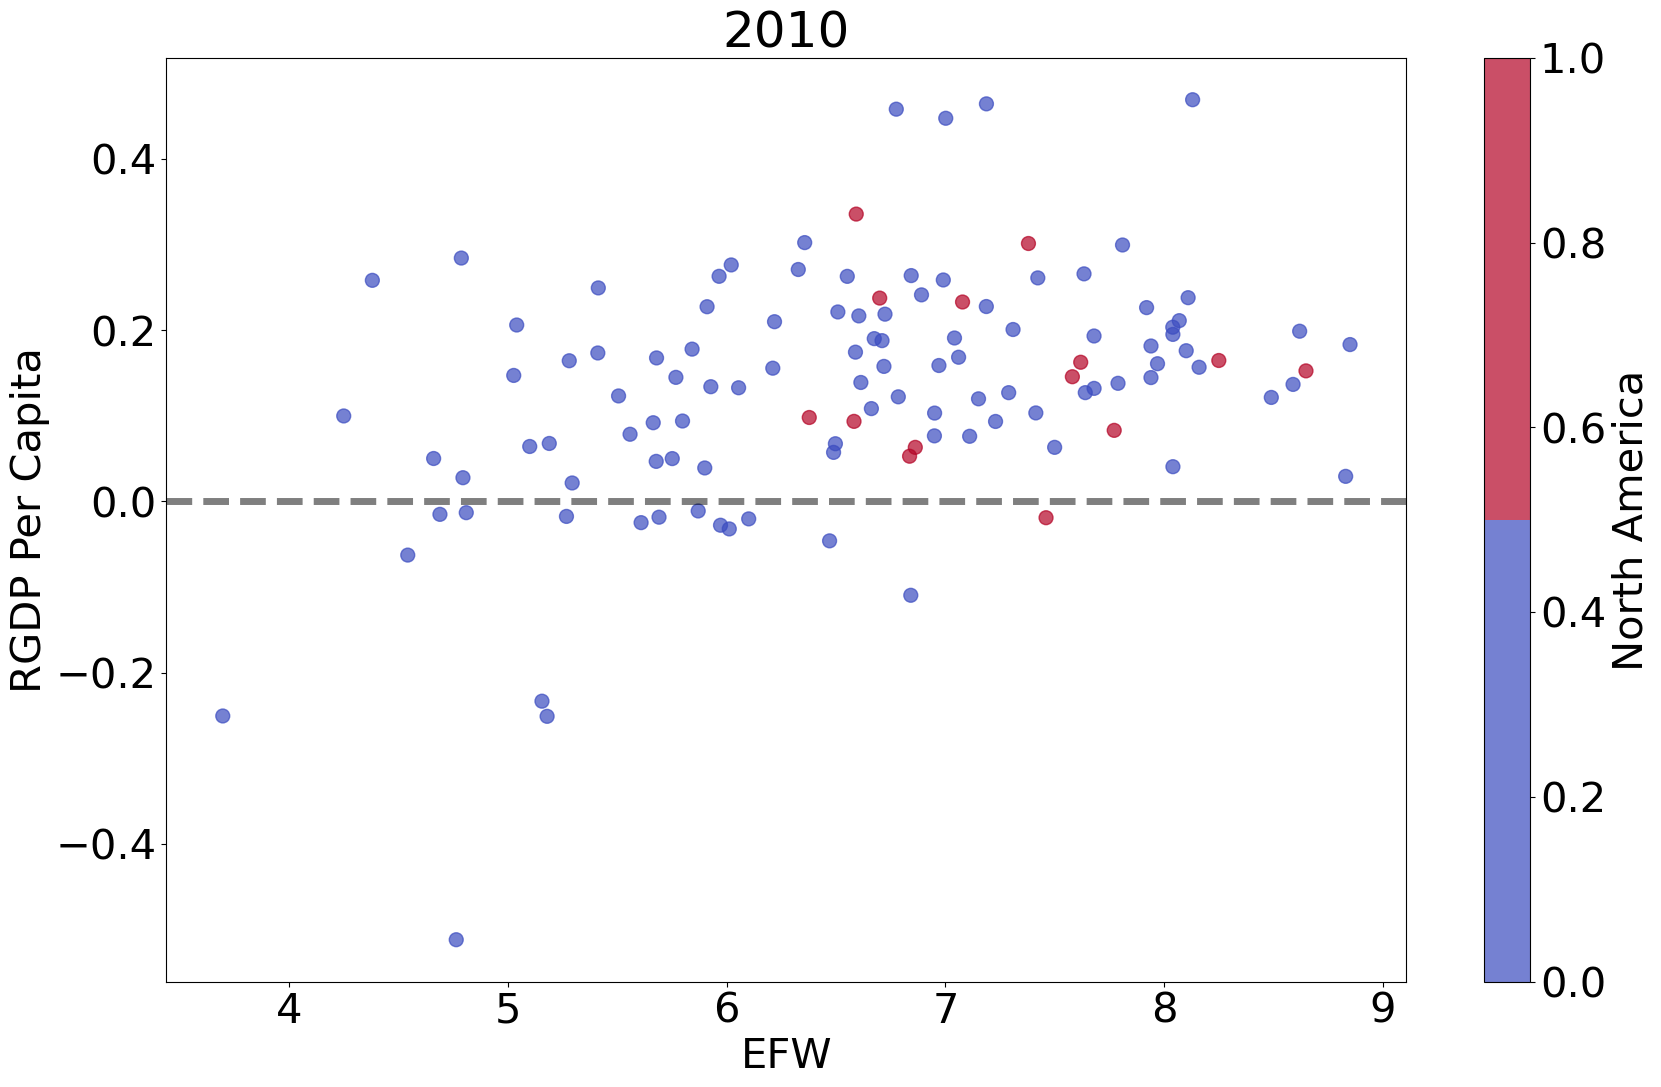

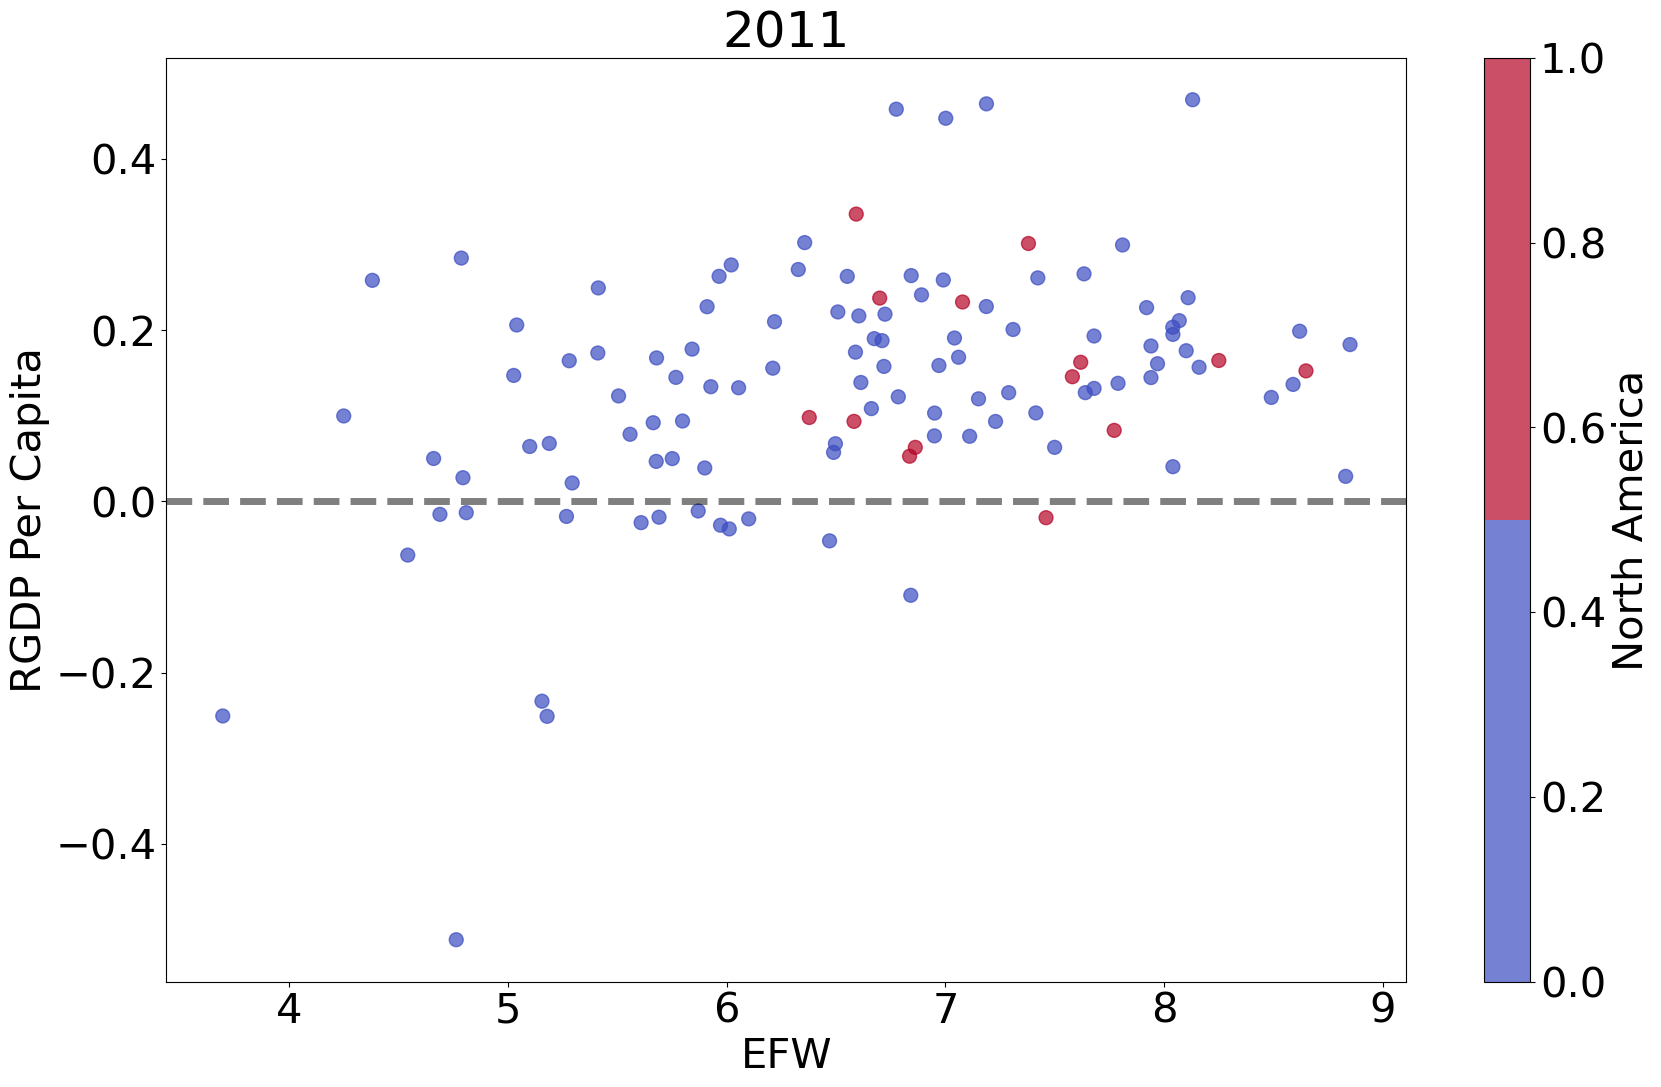

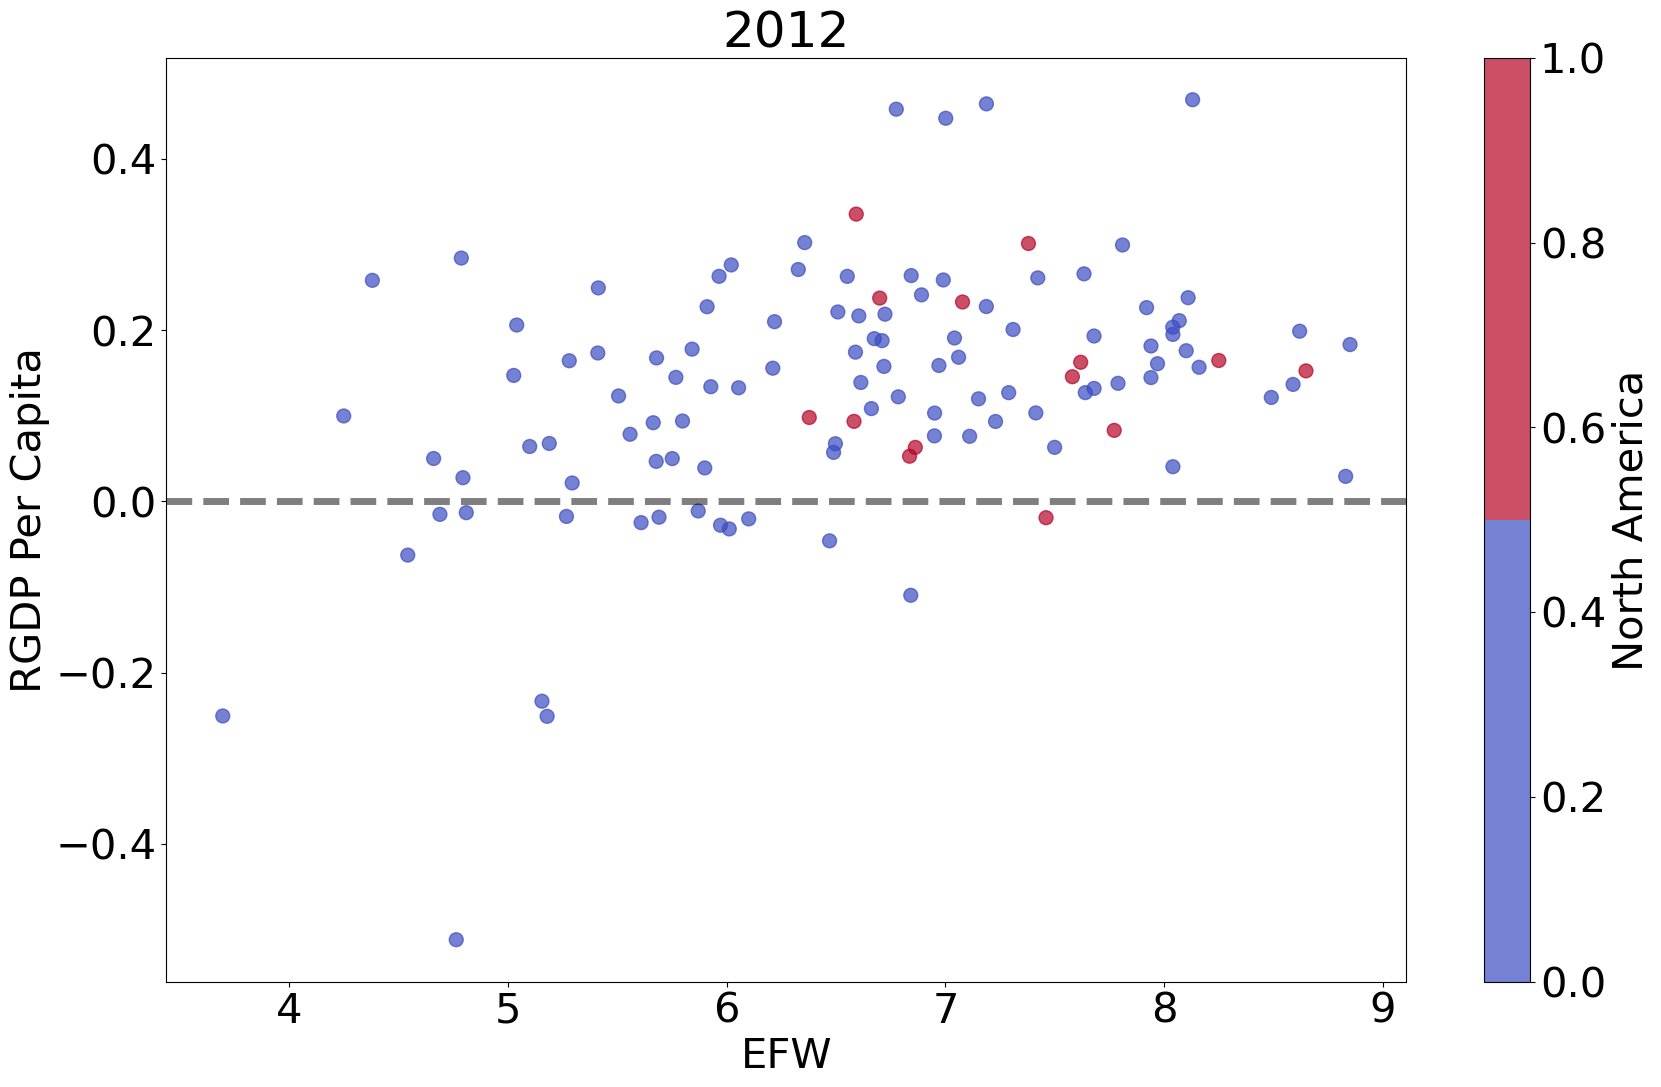

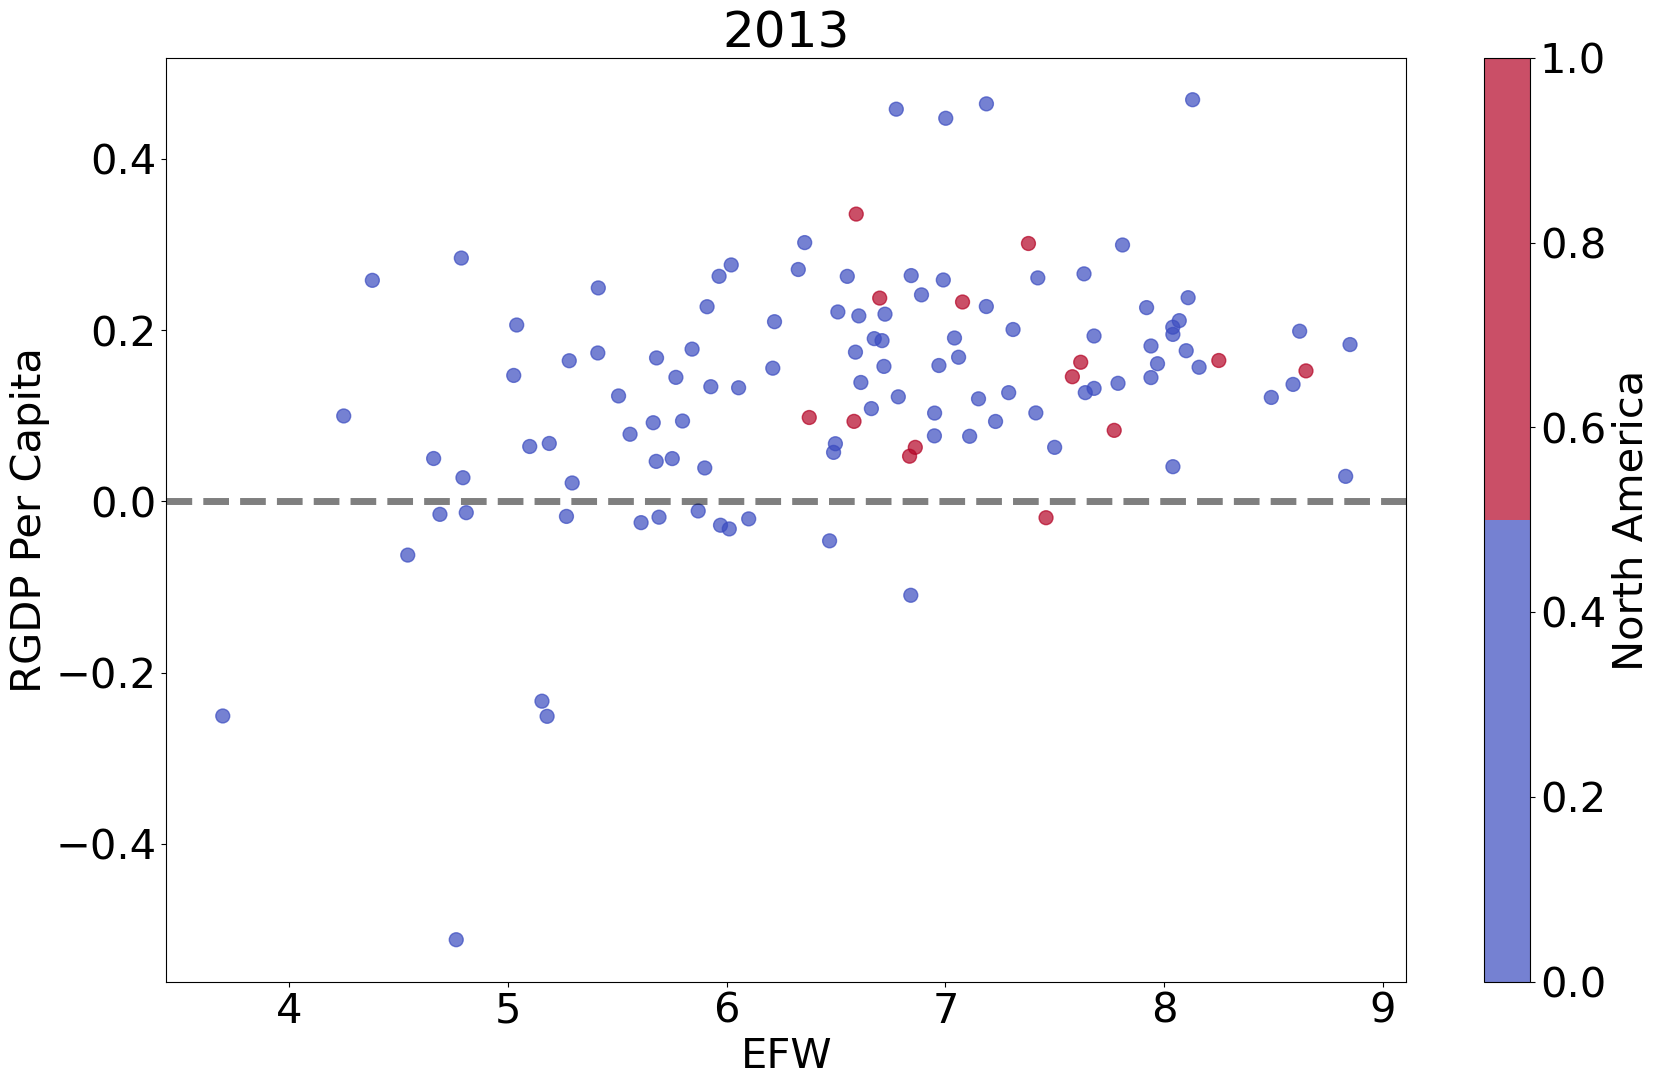

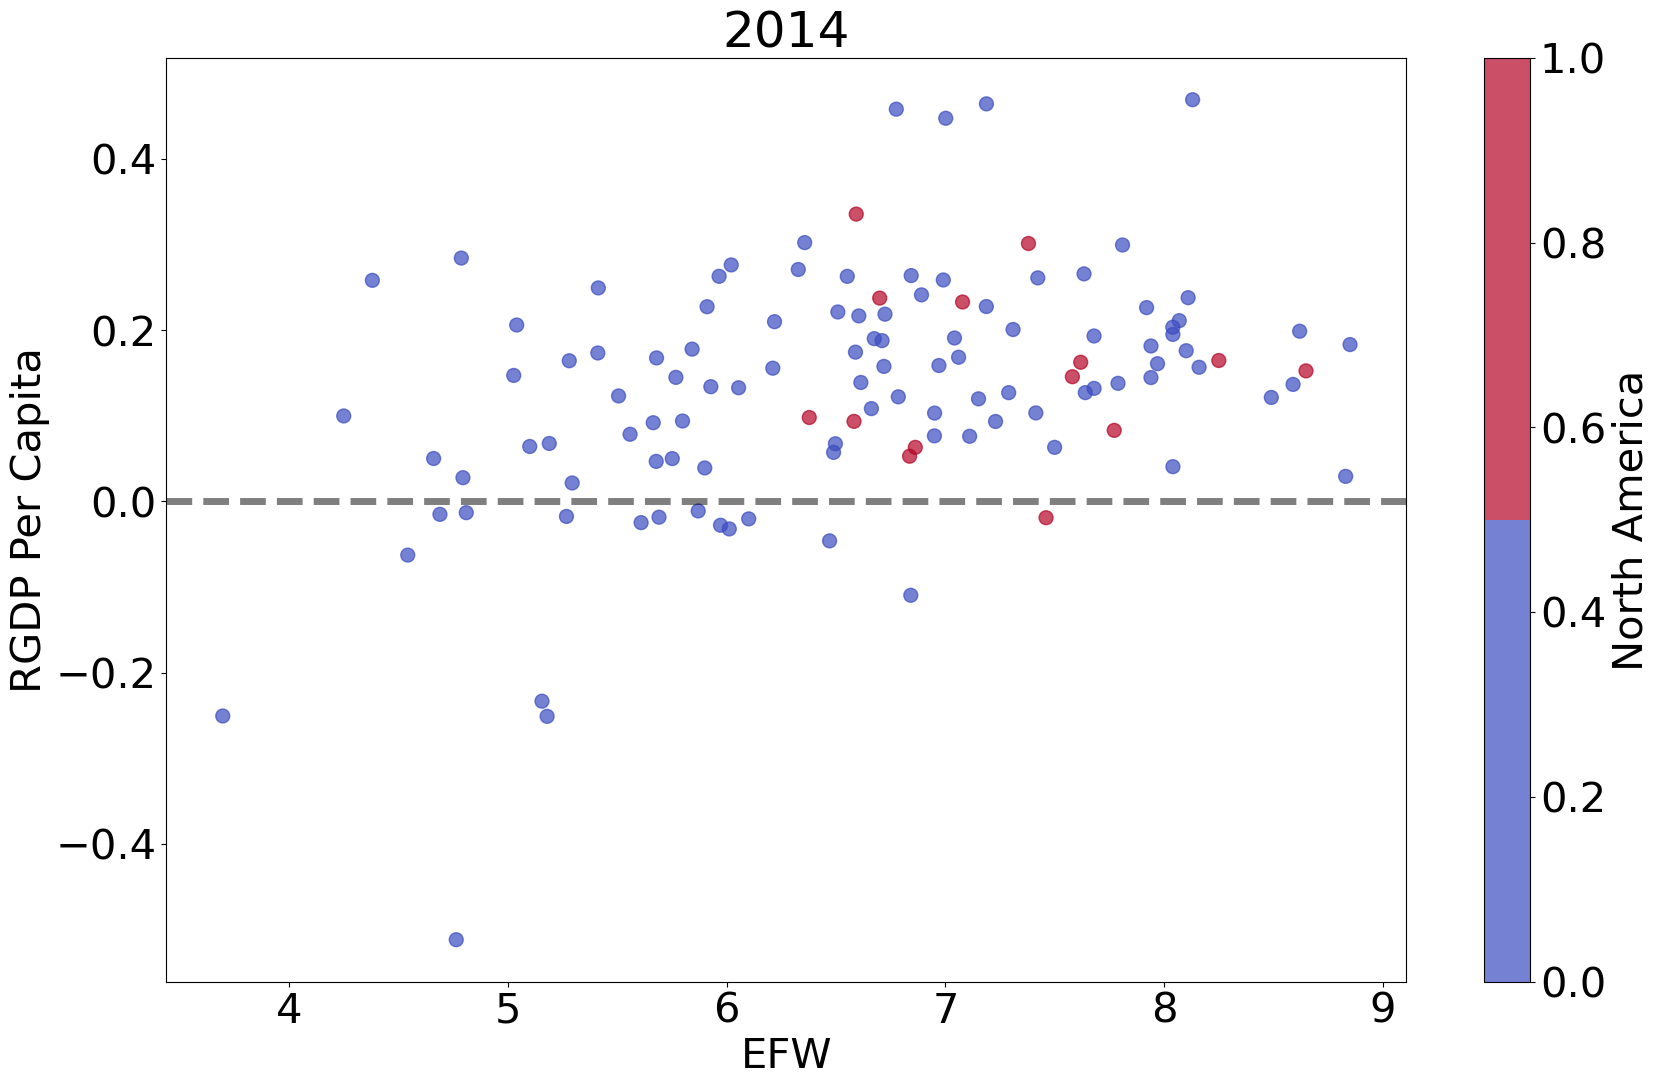

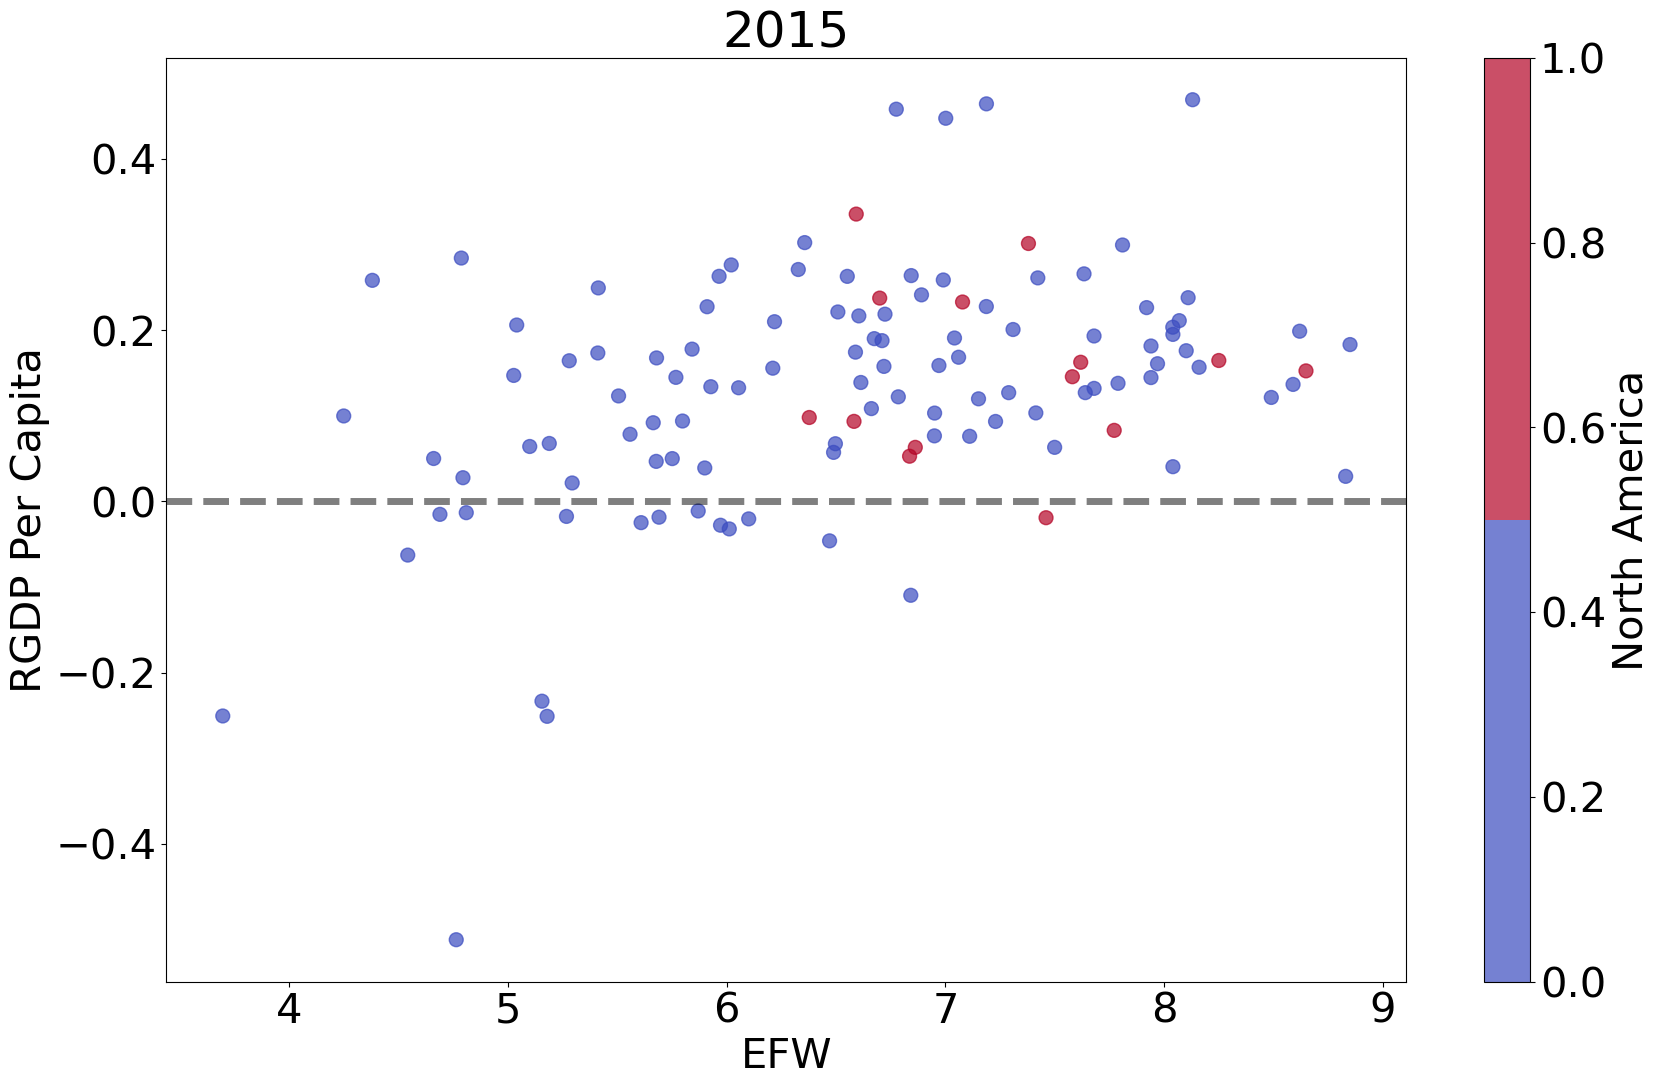

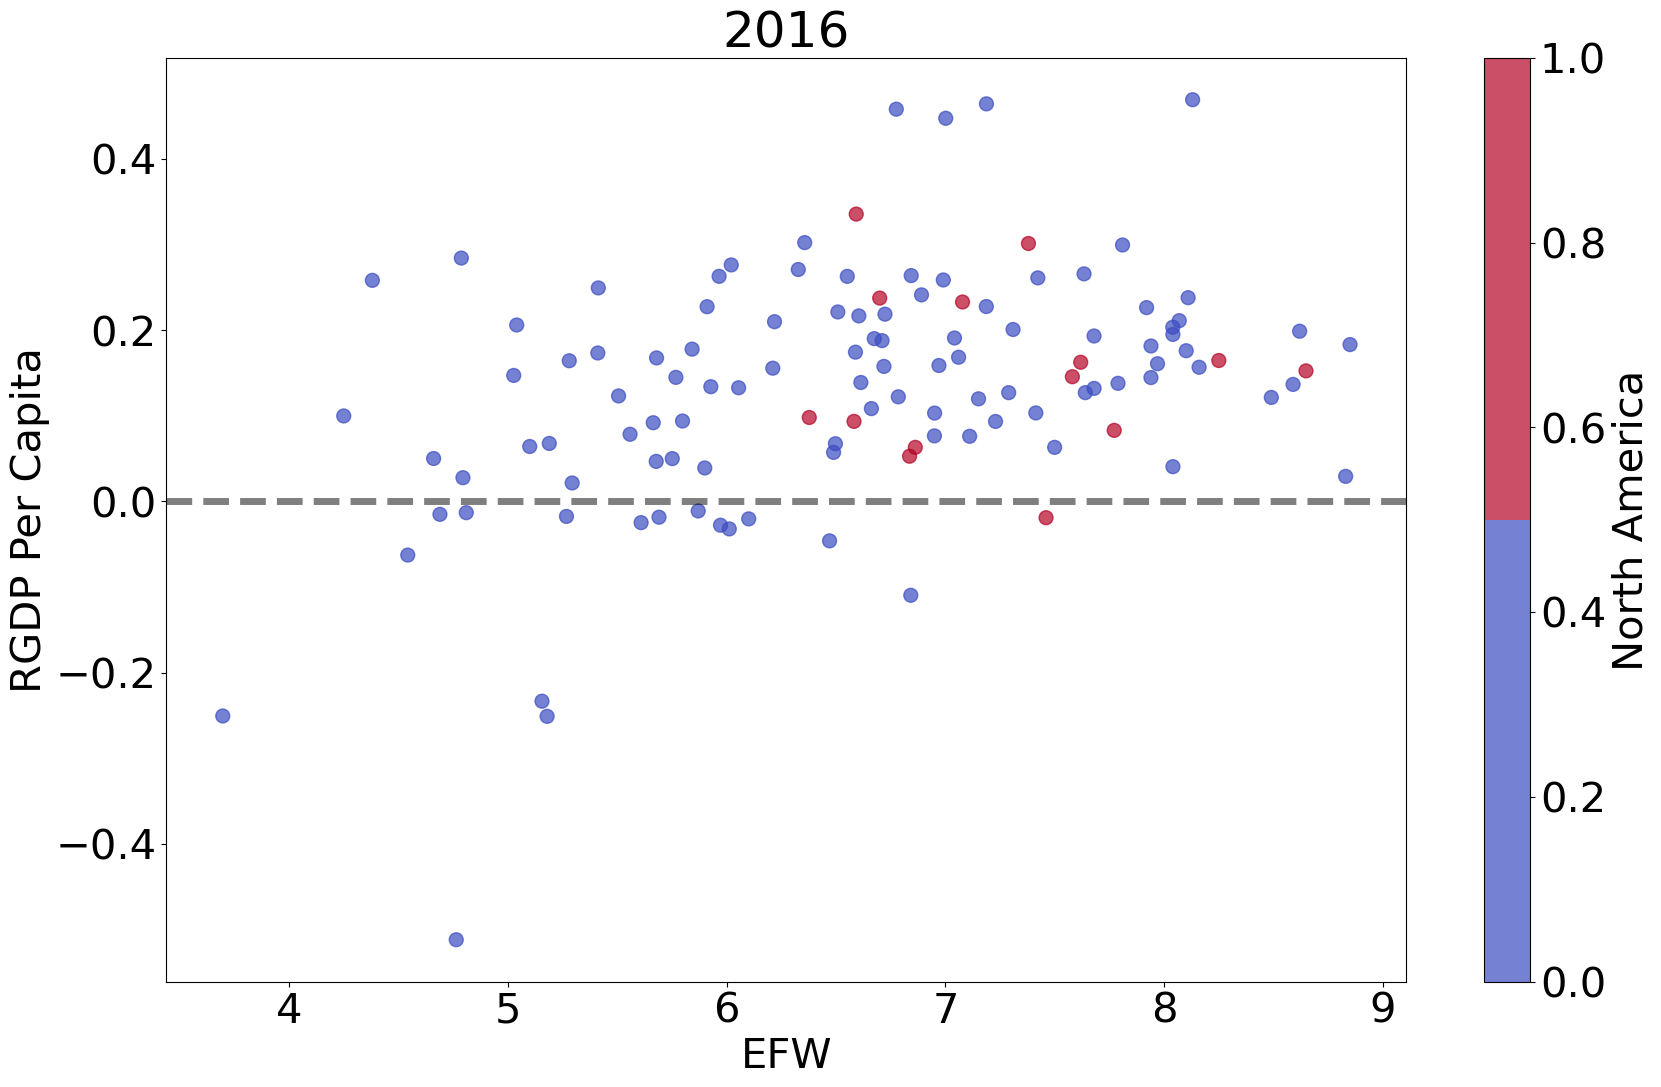

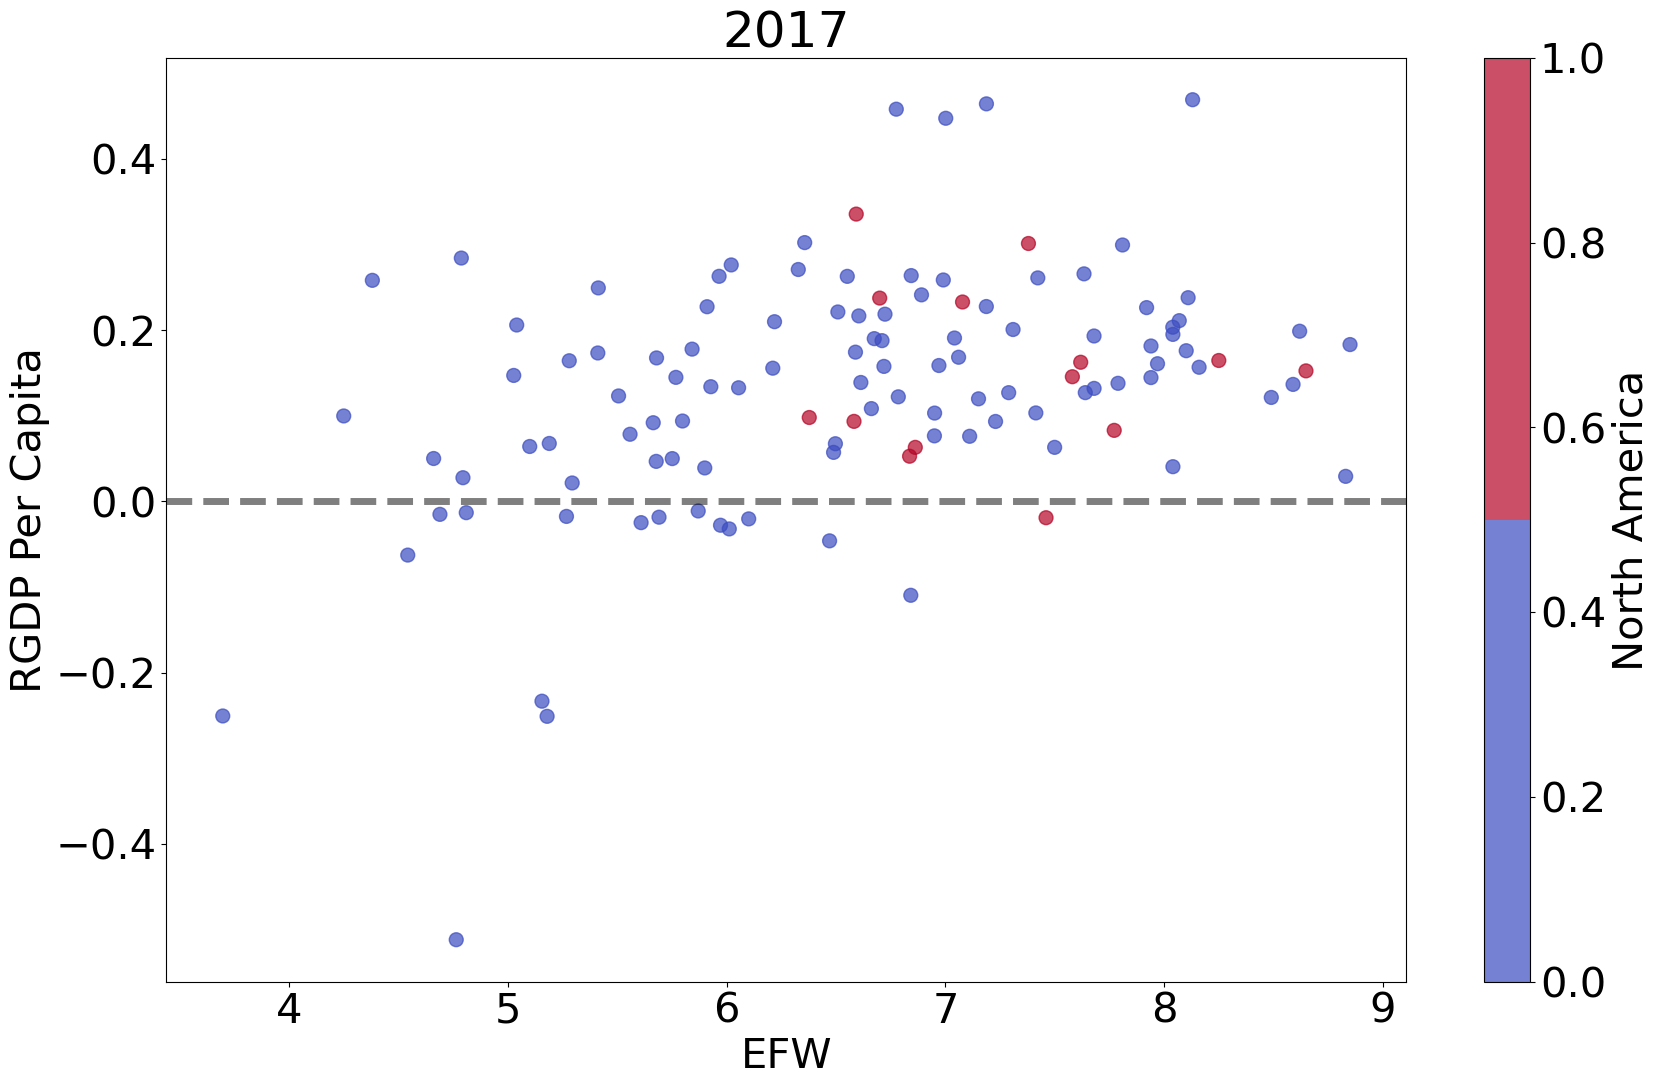

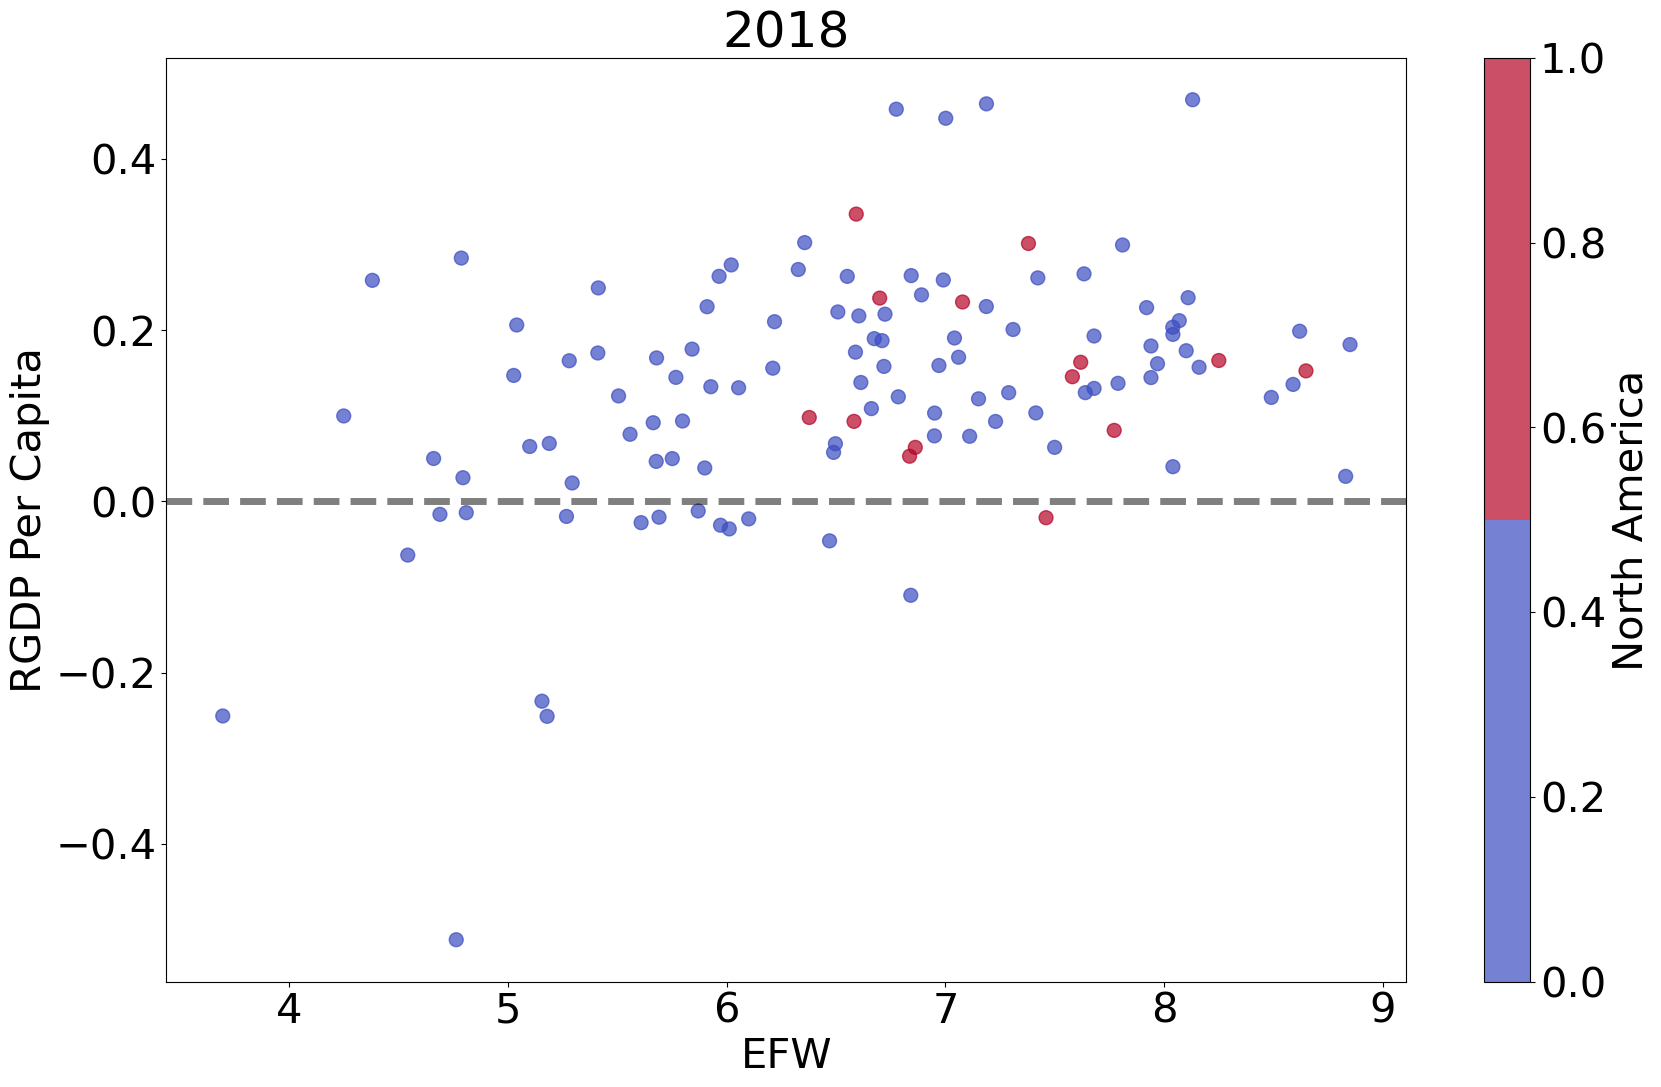

In [14]:
from matplotlib import cm
plt.rcParams.update({"font.size":30})
years = data.dropna(subset = ["RGDP Per Capita"]).index.get_level_values("Year").unique()
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)

for year in years: 
#year= 2000
    plot_data = data[data.index.get_level_values("Year") == "2000"]
    fig, ax = plt.subplots(figsize = (20,12))
    plot_data.plot.scatter(x = "EFW",
                          y = "RGDP Per Capita",
                          c = "North America",
                          cmap = cmap, s = 100,
                          alpha = .7,
                          ax =ax)
    ax.set_title(str(year)[:4])
    ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)

# Create Quantile Ranking

Similar to the pervious exercise, we may categorize data according ranked bins. This is accomplished by separating data into quantiles, often in the form of quartiles or quintiles, however this can be accomplished using any number of divisions. The following script allows you to create quantiles of the number of divisions of your choosing.

First, we need to import the data that we have merged. Once the dataframe is created, we must prepare a place for quantile data to be registered. Out of convenience, we will refer to the n-tile, meaning that a quartile will be labeled a “4-tile”, a quintile will be label a “5-tile”, and so forth. Before recording the data, we will create blank entries using np.nan.

In [19]:
# pick number of divisions
n = 5
#create column identifying n-tile rank  
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan

The create_quantile() function needs to be provided the number of divisions within a quantile (n), the dataframe (data), the year to which the quantile measure refers (year), the variable for which the quantile is constructed (quantile_var), and the key that will refer to the quantile data (quantile_name).

First, we construct the year_index. This provides a slice of the original index that includes only the years of interest. Next, we identify the value that divides each quantile. The pandas dataframe has a convenient command, df.quantile(percent), that will calculate the value for a particular percentile. For example, df.quantile(.25) will calculate the value representing the 25th percentile. A quantile is comprised of divisions whose size is a fraction of 1 and that sum to one. The value that divides each quantile is defined by i/n where n is the number of quartiles, and i includes all integers from 1 up to and including n.

Now that the values dividing each quantile for a given year have been identified, we can check which in which quantile each country falls. Cycle through the index for the year with for index in data[year_index].index. This allows us to calls up each individual countries data for the given year, compare that data of the category of interest to the quantile values, and select the identify quantile that the nation falls in for the year.

In [26]:
def create_quantile(n,
                   data,
                   year,
                   quantile_var,
                   quantile_name):
    #index that identifies countries for a given year
    #boolean index:
    year_index = data.index.get_level_values("Year") == year
    quantile_values_dict = {
        i:data[year_index][quantile_var].quantile(i/n) for i in range(1, n+1)}
   # cycle through each country in a given year
    for index in data[year_index].index:
        # identify value of the variable of interest
        val = data.loc[index][quantile_var]
        # compare that value to the values that divide each quantile  
        for i in range(1, n +1):
            # if the value is less than the highest in the quantile identified,  
            # then save quantile as i 
            if val <= quantile_values_dict[i]:
                data.loc[index, [quantile_name]] = int((n+1) - i)
                break
            else: 
                continue
                
for year in years:            
    create_quantile(n,data,year, quantile_var, quantile_name)
data.loc["USA"]

,Countries,EFW,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita,North America,RGDP Per Capita 5-tile
Year,,,,,,,,,,
1970-01-01,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,NaN,1,NaN
1971-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1972-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1974-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1975-01-01,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,0.080100,1,4.0
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1977-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1978-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


Again, let's identify each quantile by color. We will use code slightly different from the last time. Since the values cover a greater range, all we need to do is shift the min and max values of the color axis.

<AxesSubplot:xlabel='EFW', ylabel='RGDP Per Capita'>

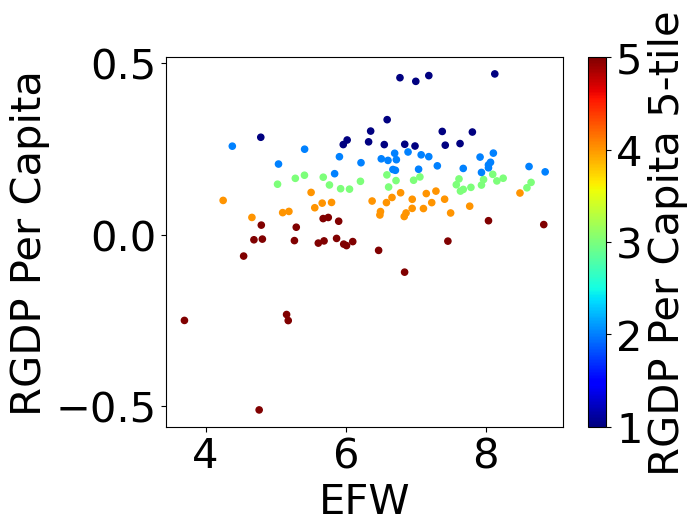

In [30]:
year = "2000"
plot_data = data[data.index.get_level_values("Year") == year]
plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = "jet")